In [1]:
import pandas as pd
import os
import sys
import numpy as np
import seaborn as sns
import re
import csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import re
import pickle
import joblib
import gensim
from gensim.utils import simple_preprocess
import spacy
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For label encoding categorical variables
from sklearn.metrics import (accuracy_score, f1_score, precision_score, 
                             recall_score, roc_auc_score, roc_curve, auc)  # For evaluating model performance
from sklearn.metrics import classification_report  # For generating classification report
from sklearn.metrics import confusion_matrix  # For generating confusion matrix
from tensorflow.keras.models import Sequential  # For creating a sequential model
from tensorflow.keras.layers import (Embedding, LSTM, Dense, Dropout, Input, 
                                     Bidirectional)  # For building neural network layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer  # For text tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences
from tensorflow.keras.utils import to_categorical  # For one-hot encoding categorical labels
from tensorflow.keras.optimizers import Adam  # For setting the optimizer for the model
#from transformers import TFBertModel, BertTokenizer  # For using pre-trained BERT model
from nltk.corpus import stopwords  # For removing stop words from text data
from nltk.tokenize import word_tokenize  # For tokenizing text data
from nltk.stem import WordNetLemmatizer  # For lemmatizing words
from tensorflow.keras.callbacks import Callback  # For custom callback during training
import time  # For measuring time duration
import nltk  # For natural language processing tools and resources
from textblob import TextBlob
from gensim.parsing.preprocessing import STOPWORDS

import transformers
from transformers import DistilBertTokenizer, BertTokenizer, TFBertModel, TFDistilBertModel
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping
import warnings
# To suppress python warning
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
print("Tensor version" + tf.__version__)
print(tf.config.list_physical_devices('GPU'))
# Suppress TensorFlow warnings
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # "2" mutes INFO and WARNING messages, "3" mutes all messages
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) # This will show only TensorFlow Error messages
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from sklearn.utils.class_weight import compute_class_weight
from gensim.models import Word2Vec
import string
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import ADASYN
from sklearn.utils import resample
from tensorflow.keras.optimizers import SGD
from transformers import XLNetTokenizer, TFXLNetForSequenceClassification
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification, TFRobertaModel
from transformers import GPT2Tokenizer, TFGPT2ForSequenceClassification, TFGPT2Model
from transformers import ElectraTokenizer, TFElectraForSequenceClassification
from keras.layers import Reshape
from keras.layers import Activation
from keras.layers import Flatten
from transformers import AlbertTokenizer, TFAlbertForSequenceClassification
from sklearn.model_selection import KFold
from tensorflow.keras.regularizers import l2  # Add this import statement
from gensim.models.phrases import Phrases, Phraser

2023-12-31 22:04:40.662532: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensor version2.11.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
def excel_df(file_name):
    df = pd.read_excel(file_name)
    return df 

In [6]:
# A function that reshapes a DataFrame using melt function from Pandas.

def melt_df(melt_df_name):
    melted_df = melt_df_name.melt(var_name = "Question", value_name = "Review")
    return melted_df

### Preprocessing the Cleaned Data.

In [26]:
def preprocess_text(text):
    
    # Step 1: Remove retweets
    retweet_pattern = re.compile(r'^RT @\w+:')
    text = re.sub(retweet_pattern, '', text)
    
    # Step 2: Handle user mentions
    text = re.sub(r'@\w+', '', text)
    
    # Step 3: Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Step 4: Handle URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Step 5: Remove leading and trailing whitespaces
    text = text.strip()

    # Step 6: Special Character Removal
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Step 7: Remove commas and other special characters
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    text = re.sub(r'/n\d', '', text)
    
    # Step 8: Remove non-ASCII characters
    text = ''.join(char for char in text if ord(char) < 128)

    # Step 9: Replace more than two consecutive identical characters with two
    text = re.sub(r'(.)\1+', r'\1\1', text)

    # Step 10: Convert to lowercase
    text = text.lower()

    # Step 11: Tokenization
    tokens = word_tokenize(text)

    # Step 12: Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Step 13: Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Step 14: Remove short words
    #tokens = [word for word in tokens if len(word) > 2]

    # Step 15: Join the tokens back into text
    text = ' '.join(tokens)

    return text

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False)) #
#deacc=True removes punctuations
data = cleaned_df["concatenated"].tolist()
data_words = list(sent_to_words(data))
print('data_words[:1]', data_words[:1])

In [40]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher
#threshold fewer phrases.
#print('bigram',bigram)
#print('bigram data',bigram[data_words])
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
#print('trigram',trigram)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
bigram_mod.save("bigram_mod")
trigram_mod.save("trigram_mod")
bigram_mod = gensim.models.Phrases.load("bigram_mod")
trigram_mod = gensim.models.Phrases.load("trigram_mod")

In [41]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.copy()
# Define functions for stopwords, bigrams, trigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in
my_stop_words] for doc in texts]

In [42]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [43]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [44]:
def lemmatization(texts, allowed_postags = ["NOUN", "ADJ", "VERB", "ADV"]): 
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN','ADJ', 'VERB', 'ADV'])
print('data_lemmatized[:1]', data_lemmatized[:1])

### Using Sentiment Dataset with 1 Million Tweets.

#### Loading the dataset.

In [ ]:
final_df = pd.read_csv("dataset_twitter.csv")

In [3]:
final_df

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious
...,...,...,...
937849,@Juice_Lemons in the dark. it’s so good,en,positive
937850,8.SSR &amp; Disha Salian case should be solved...,en,negative
937851,*ACCIDENT: Damage Only* - Raleigh Fire Depart...,en,negative
937852,@reblavoie So happy for her! She’s been incred...,en,positive


### Data Cleaning

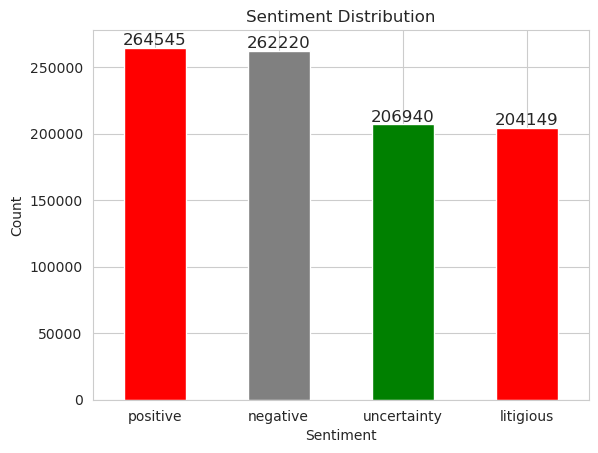

In [4]:
# Counting the number of occurrences for each sentiment.
sentiment_counts = final_df['Label'].value_counts()

# Creating a bar chart to visualize the sentiment distribution.
ax = sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Adding count labels on top of each bar.
for i, count in enumerate(sentiment_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
plt.savefig("sentiment_dist", format = "png", dpi = 300)
plt.show()


In [5]:
# Dropping all non-English and/or litigious labelled records.

final_df.drop(final_df[final_df['Language'] != "en"].index, inplace=True)
final_df.drop(final_df[final_df['Label'] == "litigious"].index, inplace=True)
final_df.reset_index(drop=True, inplace=True)

In [6]:
final_df['Label'] = final_df['Label'].replace('uncertainty', 'neutral')

In [7]:
final_df

,Text,Language,Label
0,Rwanda is set to host the headquarters of Unit...,en,positive
1,It sucks for me since I'm focused on the natur...,en,negative
2,@ShawnTarloff @itsmieu you can also relate thi...,en,neutral
3,Social Security. Constant political crises dis...,en,negative
4,@FilmThePoliceLA A broken rib can puncture a l...,en,negative
...,...,...,...
691243,@Juice_Lemons in the dark. it’s so good,en,positive
691244,8.SSR &amp; Disha Salian case should be solved...,en,negative
691245,*ACCIDENT: Damage Only* - Raleigh Fire Depart...,en,negative
691246,@reblavoie So happy for her! She’s been incred...,en,positive


In [ ]:
# Dropping the duplicate records in column "text".

#final_df = final_df.drop_duplicates(subset = "Text", keep = "first", ignore_index = True)
#final_df.reset_index(drop=True, inplace=True)

In [9]:
# Checking for null values in the sen_df dataframe.

#final_df.isna().sum()

In [10]:
# Checking for blank records in the sen_df dataframe.

#final_df[(final_df["Text"] == "") | (final_df["Text"].str.isspace())].sum()

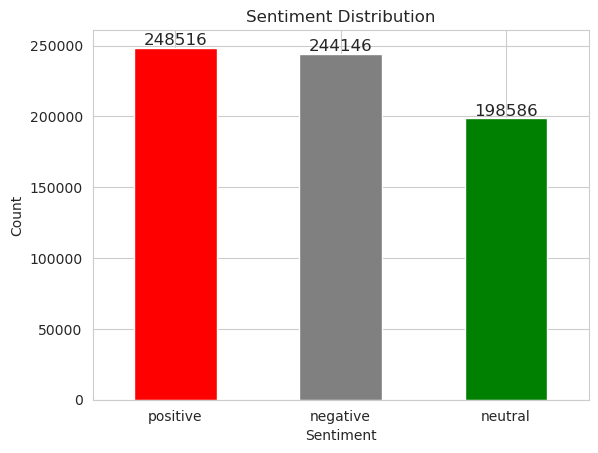

In [8]:
# Counting the number of occurrences for each sentiment.
sentiment_counts = final_df['Label'].value_counts()

# Creating a bar chart to visualize the sentiment distribution.
ax = sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Adding count labels on top of each bar.
for i, count in enumerate(sentiment_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
plt.savefig("sentiment_dist2", format = "png", dpi = 300)
plt.show()

### Preprocessing the dataset.

In [9]:
# Making a copy of the sen-df dataframe.

final_df2 = final_df.copy()

In [10]:
final_df2

,Text,Language,Label
0,Rwanda is set to host the headquarters of Unit...,en,positive
1,It sucks for me since I'm focused on the natur...,en,negative
2,@ShawnTarloff @itsmieu you can also relate thi...,en,neutral
3,Social Security. Constant political crises dis...,en,negative
4,@FilmThePoliceLA A broken rib can puncture a l...,en,negative
...,...,...,...
691243,@Juice_Lemons in the dark. it’s so good,en,positive
691244,8.SSR &amp; Disha Salian case should be solved...,en,negative
691245,*ACCIDENT: Damage Only* - Raleigh Fire Depart...,en,negative
691246,@reblavoie So happy for her! She’s been incred...,en,positive


In [12]:
# Apply the function to a pandas Series (list of text instances)
final_df2["cleaned_text"] = final_df2["Text"].apply(preprocess_text)

In [13]:
final_df2

,Text,Language,Label,cleaned_text
0,Rwanda is set to host the headquarters of Unit...,en,positive,rwanda set host headquarters united nation dev...
1,It sucks for me since I'm focused on the natur...,en,negative,suck since im focused nature aspect thing envi...
2,@ShawnTarloff @itsmieu you can also relate thi...,en,neutral,also relate art lot people dismayed starting a...
3,Social Security. Constant political crises dis...,en,negative,social security constant political crisis dist...
4,@FilmThePoliceLA A broken rib can puncture a l...,en,negative,broken rib puncture lung lead collapsed lung m...
...,...,...,...,...
691243,@Juice_Lemons in the dark. it’s so good,en,positive,dark good
691244,8.SSR &amp; Disha Salian case should be solved...,en,negative,amp disha salian case solved amp drug cartel f...
691245,*ACCIDENT: Damage Only* - Raleigh Fire Depart...,en,negative,accident damage raleigh fire department fairwa...
691246,@reblavoie So happy for her! She’s been incred...,en,positive,happy shes incredible


In [14]:
# Checking for duplicate records in the "text" column.

final_df2["cleaned_text"].duplicated().sum()

51060

In [15]:
# Use the `duplicated()` function to create a boolean mask of duplicated rows
duplicates_mask = final_df2["cleaned_text"].duplicated(keep='first')

# Use the mask to filter the DataFrame and return duplicated rows
duplicated_records = final_df2[duplicates_mask]
duplicated_records = duplicated_records.sort_values(by="cleaned_text")

# Display the duplicated records
print("Duplicated Records:")
duplicated_records

Duplicated Records:


,Text,Language,Label,cleaned_text
234462,@ue3noyama What?,en,negative,
349742,@IAmChrisJalbert Now and Then🤣😂🤣,en,negative,
418886,#help #find my #lost #umbrella #airtag in #sin...,en,negative,
245091,@broken_heart490 @daddys_girltn Very..,en,negative,
245099,@alicemazzy @xsphi what IF,en,positive,
...,...,...,...,...
593428,"Zubair is not just an incredible journalist, h...",en,positive,zubair incredible journalist he best u elevate...
520996,"Zubair is not just an incredible journalist, h...",en,positive,zubair incredible journalist he best u elevate...
490268,@NabiyaKhan11 @zoo_bear Zubair is not just an ...,en,positive,zubair incredible journalist he best u elevate...
640731,Zubby Michael Meet An Accident Details Explain...,en,negative,zubby michael meet accident detailsexplained


In [16]:
# Dropping the duplicate records in column "text".

final_df2 = final_df2.drop_duplicates(subset = "cleaned_text", keep = "first", ignore_index = True)
final_df2.reset_index(drop=True, inplace=True)

In [17]:
# Checking for null values in the sen_df dataframe.

final_df2["cleaned_text"].isna().sum()

0

In [18]:
# Checking for blank records in the sen_df dataframe.

empty_whitespace_count = final_df2["cleaned_text"].apply(lambda x: x == "" or x.isspace()).sum()
print("Count of empty or whitespace-only strings:", empty_whitespace_count)

Count of empty or whitespace-only strings: 1


In [19]:
empty_whitespace_rows2 = final_df2[(final_df2["cleaned_text"] == "") | (final_df2["cleaned_text"].str.isspace())]
empty_whitespace_rows2

,Text,Language,Label,cleaned_text
11089,#Innovation #SuicidePrevention #CausalityCrisi...,en,positive,


In [20]:
# Remove rows with empty string or whitespace in "cleaned_text" column
final_df2 = final_df2[~((final_df2["cleaned_text"] == "") | (final_df2["cleaned_text"].str.isspace()))]

# Reset the index after removing rows
final_df2 = final_df2.reset_index(drop=True)

In [22]:
# Export the DataFrame to a CSV file
final_df2.to_csv("clean_twitter_dataset.csv", index=False)  # Set index=False to exclude the index column

# Start Here

In [2]:
final_df2 = pd.read_csv("clean_twitter_dataset.csv")

In [3]:
final_df2

,Text,Language,Label,cleaned_text
0,Rwanda is set to host the headquarters of Unit...,en,positive,rwanda set host headquarters united nation dev...
1,It sucks for me since I'm focused on the natur...,en,negative,suck since im focused nature aspect thing envi...
2,@ShawnTarloff @itsmieu you can also relate thi...,en,neutral,also relate art lot people dismayed starting a...
3,Social Security. Constant political crises dis...,en,negative,social security constant political crisis dist...
4,@FilmThePoliceLA A broken rib can puncture a l...,en,negative,broken rib puncture lung lead collapsed lung m...
...,...,...,...,...
640182,@Juice_Lemons in the dark. it’s so good,en,positive,dark good
640183,8.SSR &amp; Disha Salian case should be solved...,en,negative,amp disha salian case solved amp drug cartel f...
640184,*ACCIDENT: Damage Only* - Raleigh Fire Depart...,en,negative,accident damage raleigh fire department fairwa...
640185,@reblavoie So happy for her! She’s been incred...,en,positive,happy shes incredible


### Implementing Bert.

In [3]:
# Making a copy of the dataframe for Bert.

bert_df = final_df2.copy()

In [4]:
# Load the BERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [5]:
# Load the pre-trained BERT mod
bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


# Stop

In [9]:
# Separating feature and target data
X_bert = bert_df['cleaned_text']  # Feature data (review text)
y_bert = bert_df['Label']   # Target data (sentiment labels)

In [10]:
# Create a label encoder
label_encoder = LabelEncoder()

# Fit the encoder on your sentiment labels
label_encoder.fit(y_bert)

# Transform the sentiment labels to numerical values
y_bert = label_encoder.transform(y_bert)

In [11]:
# Splitting data into training and testing sets
X_train_bert, X_val_bert, y_train_bert, y_val_bert = train_test_split(X_bert, y_bert, test_size=0.1, random_state=42)

In [12]:
# Assuming y_train_bert and y_val_bert are integer-encoded class labels
y_train_bert = to_categorical(y_train_bert, num_classes=3)
y_val_bert = to_categorical(y_val_bert, num_classes=3)

In [ ]:
# Assuming X_train_bert and X_val_bert are NumPy arrays
max_len = 100
# Convert individual strings to a list of strings
X_train_bert = [str(item) for item in X_train_bert]
X_val_bert = [str(item) for item in X_val_bert]

# Tokenize and encode sequences
X_train_bert = tokenizer(X_train_bert, padding=True, truncation=True, max_length=max_len, return_tensors='tf')
X_val_bert = tokenizer(X_val_bert, padding=True, truncation=True, max_length=max_len, return_tensors='tf')

In [32]:
# Freeze the BERT layers and add a classification layer
input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')
bert_output = bert_model({'input_ids': input_ids, 'attention_mask': attention_mask})[0]
output = Dense(3, activation='softmax')(bert_output[:, 0, :])
model = Model(inputs=[input_ids, attention_mask], outputs=output)

In [33]:
# Freeze the BERT layers
bert_model.trainable = False

In [29]:
# Add a dropout layer
#dropout_layer = Dropout(dropout_rate)(bert_output[:, 0, :])

In [34]:
#output = Dense(3, activation='softmax')(dropout_layer)  # Assuming 3 classes

#model = Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile the model with the Adam optimizer and the learning rate schedule
#optimizer = Adam(learning_rate=initial_learning_rate)  # Initial learning rate
optimizer = Adam()  # Initial learning rate

In [35]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 100)]        0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 100)]        0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['attention_mask[0][0]',         
 BertModel)                     ast_hidden_state=(N               'input_ids[0][0]']              
                                one, 100, 768),                                                   
                                 hidden_states=None                                           

In [ ]:
start_time = time.time()

history_bert = model.fit(
    [X_train_bert['input_ids'], X_train_bert['attention_mask']],
    y_train_bert,
    batch_size=1000,
    epochs=20,
    validation_data=([X_val_bert['input_ids'], X_val_bert['attention_mask']], y_val_bert)
)

end_time = time.time()

Epoch 1/20
553/553 [==============================] - 701s 1s/step - loss: 0.7402 - accuracy: 0.6947 - val_loss: 0.7096 - val_accuracy: 0.7105
Epoch 2/20
553/553 [==============================] - 700s 1s/step - loss: 0.7220 - accuracy: 0.7023 - val_loss: 0.6913 - val_accuracy: 0.7181
Epoch 3/20
553/553 [==============================] - 699s 1s/step - loss: 0.7079 - accuracy: 0.7091 - val_loss: 0.6781 - val_accuracy: 0.7249
Epoch 4/20
553/553 [==============================] - 699s 1s/step - loss: 0.6973 - accuracy: 0.7137 - val_loss: 0.6655 - val_accuracy: 0.7299
Epoch 5/20
553/553 [==============================] - 699s 1s/step - loss: 0.6894 - accuracy: 0.7177 - val_loss: 0.6562 - val_accuracy: 0.7342
Epoch 6/20
553/553 [==============================] - 699s 1s/step - loss: 0.6848 - accuracy: 0.7189 - val_loss: 0.6506 - val_accuracy: 0.7362
Epoch 7/20
553/553 [==============================] - 699s 1s/step - loss: 0.6804 - accuracy: 0.7212 - val_loss: 0.6446 - val_accuracy: 0.7387

In [ ]:
# Saving the model.
model.save('first_distillbert_model')

In [4]:
# Loading the saved model from saved file
loaded_model = tf.keras.models.load_model('first_distillbert_model')

2023-11-24 14:23:54.286984: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 17741 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe MIG 2g.20gb, pci bus id: 0000:ae:00.0, compute capability: 8.0


In [ ]:
"""
early_stop = EarlyStopping(monitor='val_loss', patience=3)

history_bert = model.fit(
    [X_train_bert['input_ids'], X_train_bert['attention_mask']],
    y_train_bert,
    batch_size=20,
    epochs=20,
    validation_data=([X_val_bert['input_ids'], X_val_bert['attention_mask']], y_val_bert),
    callbacks=[early_stop, lr_schedule]
)
"""

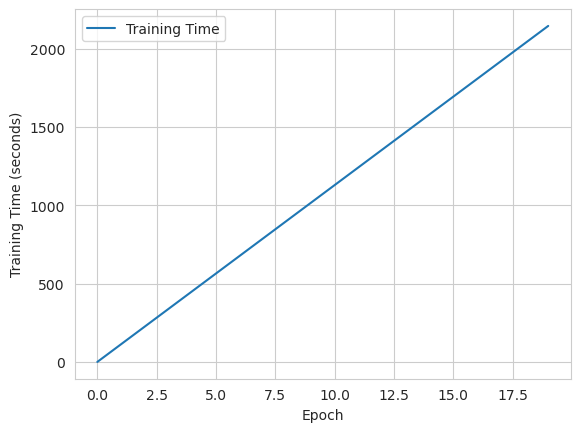

In [48]:
training_time_per_epoch = (end_time - start_time) / len(history_bert.history['accuracy'])

# Plot training time graph
plt.plot(history_bert.epoch, [training_time_per_epoch * i for i in range(len(history_bert.epoch))], label='Training Time')
plt.xlabel('Epoch')
plt.ylabel('Training Time (seconds)')
plt.legend()
plt.savefig("distill_first_time", dpi = 300)
plt.show()

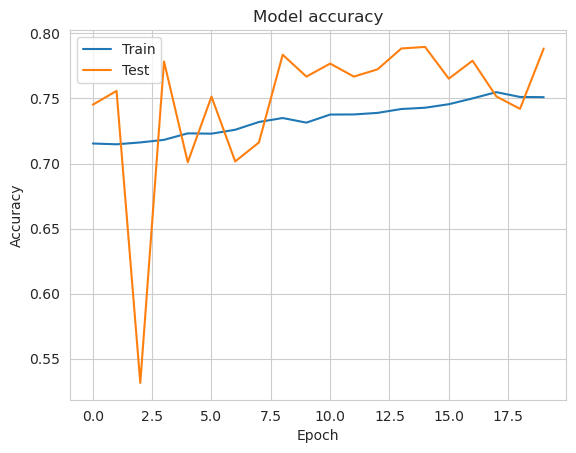

In [49]:
# Plot the validation training graph
plt.plot(history_bert.history['accuracy'])
plt.plot(history_bert.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("distill_first_acc2", format="png", dpi = 300)
plt.show()

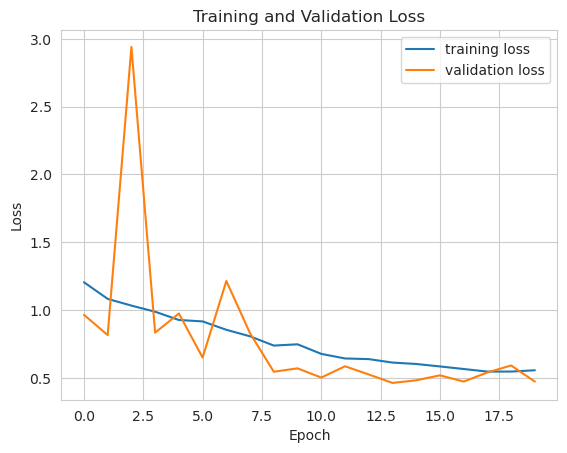

In [50]:
# Plot the training and validation loss
plt.plot(history_bert.history['loss'], label='training loss')
plt.plot(history_bert.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("distill_first_loss2", format="png", dpi = 300)
plt.show()

In [12]:
y_val_bert = np.argmax(y_val_bert, axis=1)

4321/4321 [==============================] - 302s 70ms/step
Confusion Matrix:
[[39037  4797  5200]
 [ 7221 24680  7913]
 [ 5061  4154 40187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78     49034
           1       0.73      0.62      0.67     39814
           2       0.75      0.81      0.78     49402

    accuracy                           0.75    138250
   macro avg       0.75      0.74      0.74    138250
weighted avg       0.75      0.75      0.75    138250



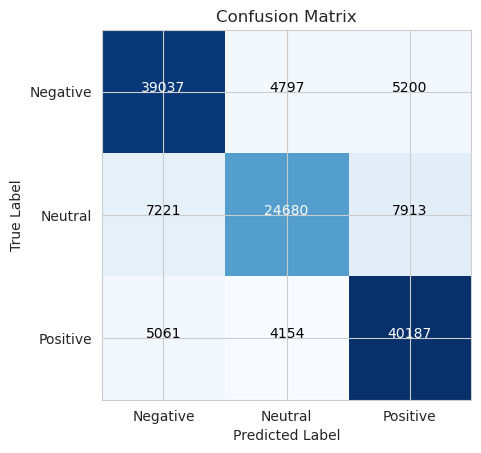

In [13]:
# Load and preprocess your test data (you need to replace this with your actual test data)
#X_test_bert = tokenizer(X_test, padding=True, truncation=True, max_length=max_len, return_tensors='tf')

# Predict on the test data
y_pred_bert = loaded_model.predict([X_val_bert['input_ids'], X_val_bert['attention_mask']])

# Convert the predicted probabilities to class labels (0, 1, 2)
y_pred_labels = np.argmax(y_pred_bert, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_val_bert, y_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

# Calculate and print other classification metrics
print("Classification Report:")
print(classification_report(y_val_bert, y_pred_labels))

# Save the confusion matrix as an image file (e.g., PNG)
plt.savefig("distill_first_confusion_matrix2.png", format="png", dpi = 300)

# Start

### Distilled Bert (Balanced Data)

In [3]:
bal_df = final_df2.copy()

In [7]:
bal_df

,Text,Language,Label,cleaned_text
0,Rwanda is set to host the headquarters of Unit...,en,positive,rwanda set host headquarters united nation dev...
1,It sucks for me since I'm focused on the natur...,en,negative,suck since im focused nature aspect thing envi...
2,@ShawnTarloff @itsmieu you can also relate thi...,en,neutral,also relate art lot people dismayed starting a...
3,Social Security. Constant political crises dis...,en,negative,social security constant political crisis dist...
4,@FilmThePoliceLA A broken rib can puncture a l...,en,negative,broken rib puncture lung lead collapsed lung m...
...,...,...,...,...
640182,@Juice_Lemons in the dark. it’s so good,en,positive,dark good
640183,8.SSR &amp; Disha Salian case should be solved...,en,negative,amp disha salian case solved amp drug cartel f...
640184,*ACCIDENT: Damage Only* - Raleigh Fire Depart...,en,negative,accident damage raleigh fire department fairwa...
640185,@reblavoie So happy for her! She’s been incred...,en,positive,happy shes incredible


In [8]:
# Create a label encoder
label_encoder = LabelEncoder()

# Fit the encoder on your sentiment labels
label_encoder.fit(bal_df["Label"])

# Transform the sentiment labels to numerical values
bal_df["Label"] = label_encoder.transform(bal_df["Label"])

In [6]:
# Seperate the classes.
positive_df = bal_df[bal_df["Label"] == 2]
negative_df = bal_df[bal_df["Label"] == 0]
neutral_df = bal_df[bal_df["Label"] == 1]

# Oversampling the minority classes.
over_neg = resample(negative_df, replace = True, n_samples = len(positive_df), random_state = 42)
over_neu = resample(neutral_df, replace = True, n_samples = len(positive_df), random_state = 42)

# Concatenate the oversample data
bal_df2 = pd.concat([positive_df, over_neg, over_neu])
bal_df2.reset_index(drop=True, inplace=True)

In [7]:
# Export the DataFrame to a CSV file
bal_df2.to_csv("balanced_twitter_dataset.csv", index=False)  # Set index=False to exclude the index column

In [3]:
bal_df2 = pd.read_csv("balanced_twitter_dataset.csv")

In [3]:
bal_df2

,Text,Language,Label,cleaned_text
0,Rwanda is set to host the headquarters of Unit...,en,2,rwanda set host headquarters united nation dev...
1,Wimbledon: Nick Kyrgios admits spitting toward...,en,2,wimbledon nick kyrgios admits spitting towards...
2,is booktwt a thing? if so thats her and she sp...,en,2,booktwt thing thats speaks perfect grammar spe...
3,At the end we consume fictional stories to enj...,en,2,end consume fictional story enjoy seem fair pe...
4,#Duranto Express A1 coach AC not working prope...,en,2,express coach ac working properly prayagraj lt...
...,...,...,...,...
664369,@66usual @streetphantom @FiveSpiresLive It's a...,en,1,fairy tale stand nothing lose anyway might wel...
664370,Probably gonna try and push scholar as far as ...,en,1,probably gon na try push scholar far day anyon...
664371,Spent half an hour looking for my glasses yest...,en,1,spent half hour looking glass yesterday mornin...
664372,@ExamsCouncil i may not be if help but i know ...,en,1,may help know help somewhereplease help childh...


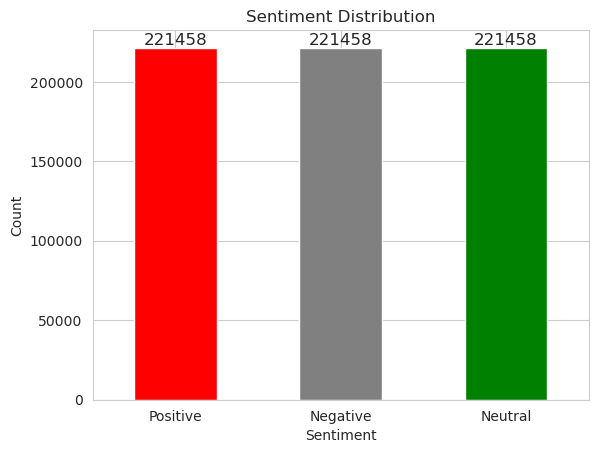

In [3]:
# Mapping numeric labels to sentiment labels
sentiment_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
bal_df2['Sentiment_Labels'] = bal_df2['Label'].map(sentiment_mapping)

# Counting the number of occurrences for each sentiment.
sentiment_counts = bal_df2['Sentiment_Labels'].value_counts()

# Creating a bar chart to visualize the sentiment distribution.
ax = sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Adding count labels on top of each bar.
for i, count in enumerate(sentiment_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
plt.savefig("distill_bal_bal", format = "png", dpi = 300)
plt.show()

### LSTM Model

In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False)) 
#deacc=True removes punctuations
#data = imdb_df['review'].tolist()
lstm_df = bal_df['cleaned_text'].tolist()
data_words = list(sent_to_words(lstm_df))
print('data_words[:1]', data_words[:1])

data_words[:1] [['rwanda', 'set', 'host', 'headquarters', 'united', 'nation', 'development', 'programme', 'undp', 'new', 'innovation', 'financing', 'facility', 'find']]


In [5]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher
#threshold fewer phrases.
#print('bigram',bigram)
#print('bigram data',bigram[data_words])
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
#print('trigram',trigram)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
bigram_mod.save("bigram_mod")
trigram_mod.save("trigram_mod")
bigram_mod = gensim.models.Phrases.load("bigram_mod")
trigram_mod = gensim.models.Phrases.load("trigram_mod")

In [6]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['br']))
# Define functions for stopwords, bigrams, trigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in
my_stop_words] for doc in texts]

In [7]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [8]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [9]:
def lemmatization(texts, allowed_postags = ["NOUN", "ADJ", "VERB", "ADV"]): 
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [10]:
#import spacy
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN','ADJ', 'VERB', 'ADV'])
#print('data_lemmatized[:1]', data_lemmatized[:1])

In [5]:
# Assuming 'data_lemmatized' is your list or data structure
# Save the variable to a file
#with open('data_lemmatized.pkl', 'wb') as file:
    #pickle.dump(data_lemmatized, file)

# Load the variable from the file
with open('data_lemmatized.pkl', 'rb') as file:
    data_lemmatized = pickle.load(file)

In [6]:
print(len(data_lemmatized))

640187


In [7]:
x = data_lemmatized
y = bal_df["Label"]

In [8]:
num_classes = 3

In [9]:
# Create a label encoder
label_encoder = LabelEncoder()

# Fit the encoder on your sentiment labels
label_encoder.fit(y)

# Transform the sentiment labels to numerical values
y = label_encoder.transform(y)

In [10]:
# Assuming y_train_bert and y_val_bert are integer-encoded class labels
#y_train = to_categorical(y_train, num_classes=3)
#y_val = to_categorical(y_val, num_classes=3)
y = to_categorical(y, num_classes=3)

In [11]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# Tokenizing the data
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [13]:
# Padding the data
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

In [14]:
print(f"The shape of X_train is {X_train.shape}.")
print(f"The shape of X_val is {X_val.shape}.")

The shape of X_train is (512149, 100).
The shape of X_val is (128038, 100).


In [30]:
model = Sequential()
model.add(Embedding(input_dim=100000, output_dim=512, input_length=maxlen))
model.add(LSTM(units=512, activation="tanh", return_sequences=True))
model.add(LSTM(units=256, activation="tanh", return_sequences=True))
model.add(LSTM(units=128, activation="tanh", return_sequences=True))
model.add(LSTM(units=64, activation="tanh", return_sequences=True))
model.add(LSTM(units=32, activation="tanh", return_sequences=True))
model.add(LSTM(units=16, activation="tanh", return_sequences=True))
model.add(LSTM(units=8, activation="tanh", return_sequences=True))
model.add(LSTM(units=4, activation="tanh"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model with custom metrics and optimizer
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 512)          51200000  
                                                                 
 lstm_24 (LSTM)              (None, 100, 512)          2099200   
                                                                 
 lstm_25 (LSTM)              (None, 100, 256)          787456    
                                                                 
 lstm_26 (LSTM)              (None, 100, 128)          197120    
                                                                 
 lstm_27 (LSTM)              (None, 100, 64)           49408     
                                                                 
 lstm_28 (LSTM)              (None, 100, 32)           12416     
                                                                 
 lstm_29 (LSTM)              (None, 100, 16)          

In [31]:
start_time = time.time()
# Train the model with validation split and batch size
history_lstm = model.fit(X_train, y_train, epochs=10, batch_size=500, validation_data=(X_val, y_val))

end_time = time.time()

Epoch 1/10
1025/1025 [==============================] - 184s 169ms/step - loss: 1.0449 - accuracy: 0.4332 - val_loss: 1.0262 - val_accuracy: 0.4684
Epoch 2/10
1025/1025 [==============================] - 106s 104ms/step - loss: 0.9063 - accuracy: 0.5348 - val_loss: 0.7193 - val_accuracy: 0.6605
Epoch 3/10
1025/1025 [==============================] - 99s 96ms/step - loss: 0.3501 - accuracy: 0.8675 - val_loss: 0.2414 - val_accuracy: 0.9239
Epoch 4/10
1025/1025 [==============================] - 100s 98ms/step - loss: 0.2052 - accuracy: 0.9313 - val_loss: 0.2302 - val_accuracy: 0.9211
Epoch 5/10
1025/1025 [==============================] - 97s 95ms/step - loss: 0.1708 - accuracy: 0.9425 - val_loss: 0.2799 - val_accuracy: 0.9140
Epoch 6/10
1025/1025 [==============================] - 97s 95ms/step - loss: 0.1387 - accuracy: 0.9538 - val_loss: 0.2698 - val_accuracy: 0.9135
Epoch 7/10
1025/1025 [==============================] - 96s 93ms/step - loss: 0.1138 - accuracy: 0.9619 - val_loss: 0.2

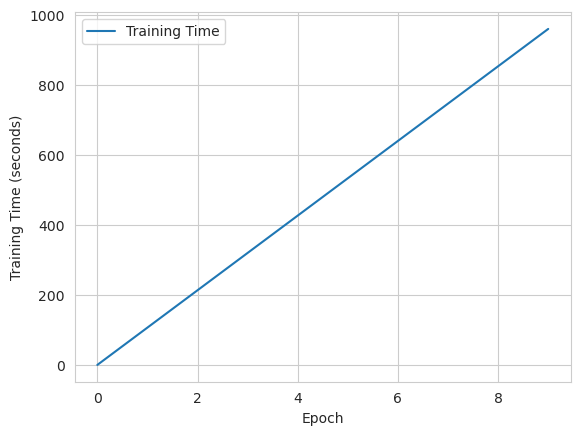

In [32]:
training_time_per_epoch = (end_time - start_time) / len(history_lstm.history['accuracy'])

# Plot training time graph
plt.plot(history_lstm.epoch, [training_time_per_epoch * i for i in range(len(history_lstm.epoch))], label='Training Time')
plt.xlabel('Epoch')
plt.ylabel('Training Time (seconds)')
plt.legend()
plt.savefig("lstm_unbal_time", dpi = 300)
plt.show()

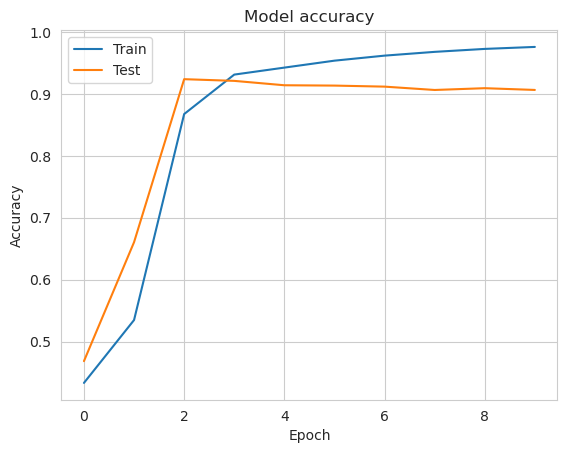

In [33]:
# Plot the validation training graph
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("lstm_unbal_acc", format="png", dpi = 300)
plt.show()

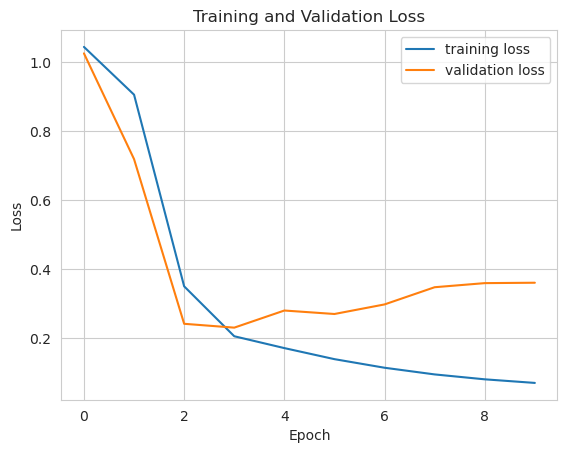

In [34]:
# Plot the training and validation loss
plt.plot(history_lstm.history['loss'], label='training loss')
plt.plot(history_lstm.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("lstm_unbal_loss", format="png", dpi = 300)
plt.show()

4002/4002 [==============================] - 50s 12ms/step
Confusion Matrix:
[[41567  3338   744]
 [ 2310 33507  2225]
 [  593  2766 40988]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     45649
           1       0.85      0.88      0.86     38042
           2       0.93      0.92      0.93     44347

    accuracy                           0.91    128038
   macro avg       0.90      0.91      0.90    128038
weighted avg       0.91      0.91      0.91    128038



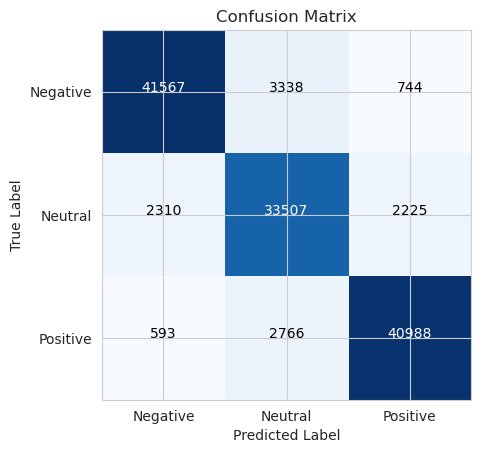

In [38]:
# Predict on the validation set
y_pred = model.predict(X_val)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)


# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

# Print a classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))
plt.savefig("lstm_unbal_confusion", format = "png", dpi = 300)

In [22]:
model = Sequential()
model.add(Embedding(input_dim=100000, output_dim=256, input_length=maxlen))
#model.add(LSTM(units=512, activation="tanh", return_sequences=True))
#model.add(LSTM(units=256, activation="tanh", return_sequences=True))

model.add(LSTM(units=128, activation="tanh", return_sequences=True))

#model.add(LSTM(units=64, activation="tanh", return_sequences=True))

#model.add(LSTM(units=32, activation="tanh", return_sequences=True))

#model.add(LSTM(units=16, activation="tanh", return_sequences=True))

#model.add(LSTM(units=8, activation="tanh", return_sequences=True))

model.add(LSTM(units=4, activation="tanh"))
model.add(BatchNormalization())
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model with custom metrics and optimizer
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 256)          25600000  
                                                                 
 lstm_8 (LSTM)               (None, 100, 128)          197120    
                                                                 
 lstm_9 (LSTM)               (None, 4)                 2128      
                                                                 
 batch_normalization_2 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 25,799,279
Trainable params: 25,799,271
Non-trainable params: 8
__________________________________________

In [24]:
start_time = time.time()
# Train the model with validation split and batch size
history_lstm2 = model.fit(X_train, y_train, epochs=20, batch_size=500, validation_data=(X_val, y_val))

end_time = time.time()

Epoch 1/20
1025/1025 [==============================] - 116s 109ms/step - loss: 0.8376 - accuracy: 0.5467 - val_loss: 0.2866 - val_accuracy: 0.9144
Epoch 2/20
1025/1025 [==============================] - 25s 24ms/step - loss: 0.2147 - accuracy: 0.9280 - val_loss: 0.2204 - val_accuracy: 0.9259
Epoch 3/20
1025/1025 [==============================] - 26s 25ms/step - loss: 0.1758 - accuracy: 0.9393 - val_loss: 0.2363 - val_accuracy: 0.9215
Epoch 4/20
1025/1025 [==============================] - 21s 20ms/step - loss: 0.1390 - accuracy: 0.9516 - val_loss: 0.2673 - val_accuracy: 0.9194
Epoch 5/20
1025/1025 [==============================] - 20s 20ms/step - loss: 0.1123 - accuracy: 0.9609 - val_loss: 0.2948 - val_accuracy: 0.9151
Epoch 6/20
1025/1025 [==============================] - 19s 18ms/step - loss: 0.0943 - accuracy: 0.9672 - val_loss: 0.3408 - val_accuracy: 0.9083
Epoch 7/20
1025/1025 [==============================] - 17s 17ms/step - loss: 0.0818 - accuracy: 0.9716 - val_loss: 0.3744

### LSTM Model (Hyperparameter Tuning)

In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False)) 
#deacc=True removes punctuations
#data = imdb_df['review'].tolist()
lstm_df = bal_df2['cleaned_text'].tolist()
data_words = list(sent_to_words(lstm_df))
print('data_words[:1]', data_words[:1])

data_words[:1] [['rwanda', 'set', 'host', 'headquarters', 'united', 'nation', 'development', 'programme', 'undp', 'new', 'innovation', 'financing', 'facility', 'find']]


In [12]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher
#threshold fewer phrases.
#print('bigram',bigram)
#print('bigram data',bigram[data_words])
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
#print('trigram',trigram)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
bigram_mod.save("bigram_mod")
trigram_mod.save("trigram_mod")
bigram_mod = gensim.models.Phrases.load("bigram_mod")
trigram_mod = gensim.models.Phrases.load("trigram_mod")

In [13]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['br']))
# Define functions for stopwords, bigrams, trigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in
my_stop_words] for doc in texts]

In [14]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [15]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [16]:
def lemmatization(texts, allowed_postags = ["NOUN", "ADJ", "VERB", "ADV", "CONJ"]): 
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [17]:
#import spacy
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized_2 = lemmatization(data_words_bigrams, allowed_postags=['NOUN','ADJ', 'VERB', 'ADV', 'CONJ'])
#print('data_lemmatized[:1]', data_lemmatized[:1])

In [18]:
# Assuming 'data_lemmatized' is your list or data structure
# Save the variable to a file
with open('data_lemmatized_2.pkl', 'wb') as file:
    pickle.dump(data_lemmatized_2, file)

#Load the variable from the file
#with open('data_lemmatized.pkl', 'rb') as file:
    #data_lemmatized_2 = pickle.load(file)

In [19]:
print(len(data_lemmatized_2))

664374


In [20]:
x = data_lemmatized_2
y = bal_df2["Label"]

In [21]:
num_classes = 3

In [22]:
# Assuming y_train_bert and y_val_bert are integer-encoded class labels
#y_train = to_categorical(y_train, num_classes=3)
#y_val = to_categorical(y_val, num_classes=3)
y = to_categorical(y, num_classes=3)

In [23]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
# Tokenizing the data
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [25]:
# Padding the data
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

In [26]:
print(f"The shape of X_train is {X_train.shape}.")
print(f"The shape of X_val is {X_val.shape}.")

The shape of X_train is (531499, 100).
The shape of X_val is (132875, 100).


In [27]:
model = Sequential()
model.add(Embedding(input_dim=100000, output_dim=1024, input_length=maxlen))
model.add(LSTM(units=512, activation="tanh", return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=256, activation="tanh", return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=128, activation="tanh", return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=64, activation="tanh", return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=32, activation="tanh", return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=16, activation="tanh", return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=8, activation="tanh", return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=4, activation="tanh"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))


# Compile the model
initial_learning_rate = 3e-5


def scheduler(epoch, lr):
    min_lr = 1e-11  # Define the minimum learning rate

    if epoch < 3:
        return lr
    else:
        new_lr = lr * tf.math.exp(-0.1)  # calculate the new learning rate
        return max(new_lr, min_lr)  # return the maximum of the new learning rate and the minimum allowed value

optimizer = Adam(learning_rate=initial_learning_rate)



# Compile the model with custom metrics and optimizer
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 1024)         102400000 
                                                                 
 lstm (LSTM)                 (None, 100, 512)          3147776   
                                                                 
 dropout (Dropout)           (None, 100, 512)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 256)          787456    
                                                                 
 dropout_1 (Dropout)         (None, 100, 256)          0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 128)          197120    
                                                                 
 dropout_2 (Dropout)         (None, 100, 128)          0

In [28]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
lr_schedule = LearningRateScheduler(scheduler)

start_time = time.time()
# Train the model with validation split and batch size
history_lstm_bal = model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_val, y_val), callbacks=[early_stop, lr_schedule])

end_time = time.time()

Epoch 1/100
1063/1063 [==============================] - 130s 104ms/step - loss: 1.1012 - accuracy: 0.3339 - val_loss: 1.0984 - val_accuracy: 0.3332 - lr: 3.0000e-05
Epoch 2/100
1063/1063 [==============================] - 106s 100ms/step - loss: 0.7763 - accuracy: 0.6354 - val_loss: 0.5150 - val_accuracy: 0.8915 - lr: 3.0000e-05
Epoch 3/100
1063/1063 [==============================] - 118s 111ms/step - loss: 0.6502 - accuracy: 0.7562 - val_loss: 0.4583 - val_accuracy: 0.9026 - lr: 3.0000e-05
Epoch 4/100
1063/1063 [==============================] - 118s 111ms/step - loss: 0.6088 - accuracy: 0.7800 - val_loss: 0.4051 - val_accuracy: 0.9105 - lr: 2.7145e-05
Epoch 5/100
1063/1063 [==============================] - 123s 115ms/step - loss: 0.5627 - accuracy: 0.8004 - val_loss: 0.3756 - val_accuracy: 0.9160 - lr: 2.4562e-05
Epoch 6/100
1063/1063 [==============================] - 119s 112ms/step - loss: 0.5287 - accuracy: 0.8160 - val_loss: 0.3378 - val_accuracy: 0.9243 - lr: 2.2225e-05
Epoc

In [29]:
# Saving the model.
model.save('lstm_model')

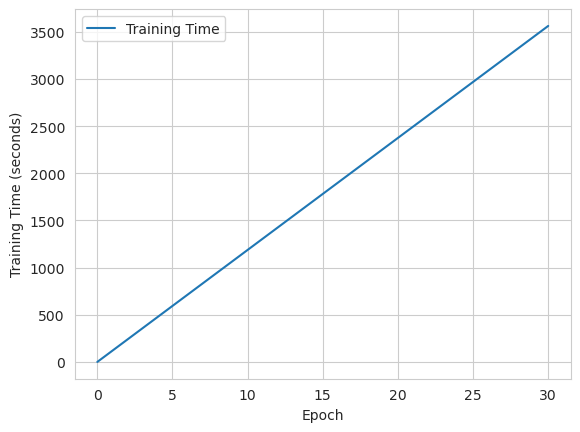

In [30]:
training_time_per_epoch = (end_time - start_time) / len(history_lstm_bal.history['accuracy'])

# Plot training time graph
plt.plot(history_lstm_bal.epoch, [training_time_per_epoch * i for i in range(len(history_lstm_bal.epoch))], label='Training Time')
plt.xlabel('Epoch')
plt.ylabel('Training Time (seconds)')
plt.legend()
plt.savefig("lstm_bal_time", dpi = 300)
plt.show()

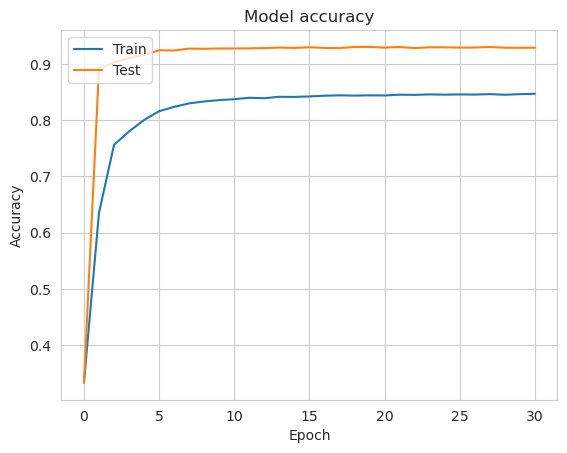

In [31]:
# Plot the validation training graph
plt.plot(history_lstm_bal.history['accuracy'])
plt.plot(history_lstm_bal.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("lstm_bal_acc", format="png", dpi = 300)
plt.show()

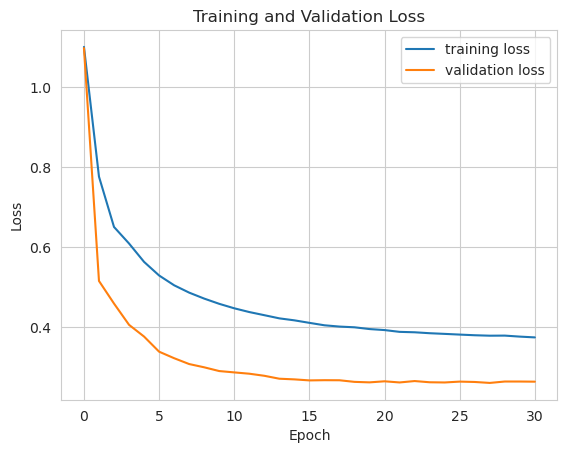

In [32]:
# Plot the training and validation loss
plt.plot(history_lstm_bal.history['loss'], label='training loss')
plt.plot(history_lstm_bal.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("lstm_bal_loss", format="png", dpi = 300)
plt.show()

4153/4153 [==============================] - 53s 12ms/step
Confusion Matrix:
[[41897  1977   498]
 [ 1703 40938  1629]
 [  823  2821 40589]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     44372
           1       0.90      0.92      0.91     44270
           2       0.95      0.92      0.93     44233

    accuracy                           0.93    132875
   macro avg       0.93      0.93      0.93    132875
weighted avg       0.93      0.93      0.93    132875



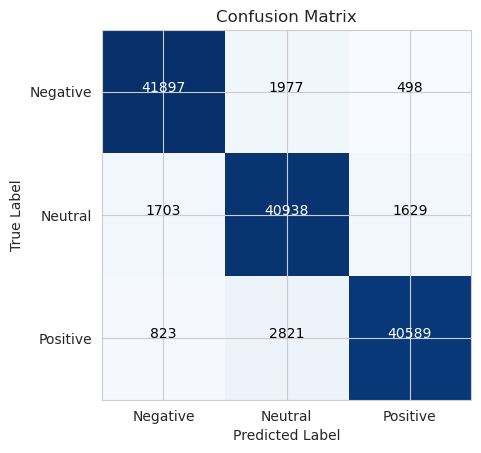

In [33]:
# Predict on the validation set
y_pred = model.predict(X_val)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)


# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

# Print a classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))
plt.savefig("lstm_bal_confusion", format = "png", dpi = 300)

### DistillBERT (Without Decaying Learning Rate)

In [4]:
# Split the dataset into training and validation sets

X_train_bert, X_val_bert, y_train_bert, y_val_bert = train_test_split(bal_df2["cleaned_text"], bal_df2["Label"], test_size=0.2, random_state=10)

In [94]:
# Splitting data into training and testing sets
#X_train_bert, X_val_bert, y_train_bert, y_val_bert = train_test_split(X_bert, y_bert, test_size=0.1, random_state=42)

In [5]:
print("Training Set Shape:", X_train_bert.shape)
print("Validation Set Shape:", X_val_bert.shape)

Training Set Shape: (531499,)
Validation Set Shape: (132875,)


In [4]:
# Assuming y_train_bert and y_val_bert are integer-encoded class labels
y_train_bert = to_categorical(y_train_bert, num_classes=3)
y_val_bert = to_categorical(y_val_bert, num_classes=3)

In [7]:
# Load the BERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [8]:
# Load the pre-trained BERT mod
bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [9]:
# Convert individual strings to a list of strings
X_train_bert = [str(item) for item in X_train_bert]
X_val_bert = [str(item) for item in X_val_bert]

# Find the maximum sequence length in the entire dataset
max_sequence_length = max(max(len(seq) for seq in X_train_bert), max(len(seq) for seq in X_val_bert))
max_len = min(max_sequence_length, 100)  # Set max_len based on the maximum sequence length

# Tokenize and encode sequences for training set
X_train_bert = tokenizer(X_train_bert, padding=True, truncation=True, max_length=max_len, return_tensors='tf')
print("Training Set Shape:", X_train_bert['input_ids'].shape)

# Tokenize and encode sequences for validation set
X_val_bert = tokenizer(X_val_bert, padding=True, truncation=True, max_length=max_len, return_tensors='tf')
print("Validation Set Shape:", X_val_bert['input_ids'].shape)

Training Set Shape: (531499, 83)
Validation Set Shape: (132875, 83)


In [10]:
# Making assign the value of the new shape to max_len.
max_len = X_val_bert['input_ids'].shape[1]

In [11]:
max_len

83

In [86]:
"""
# Assuming X_train_bert and X_val_bert are NumPy arrays
max_len = 100
# Convert individual strings to a list of strings
X_train_bert = [str(item) for item in X_train_bert]
X_val_bert = [str(item) for item in X_val_bert]

# Tokenize and encode sequences
X_train_bert = tokenizer(X_train_bert, padding=True, truncation=True, max_length=max_len, return_tensors='tf')
X_val_bert = tokenizer(X_val_bert, padding=True, truncation=True, max_length=max_len, return_tensors='tf')
"""

In [17]:
"""
Assuming X_train_bert and X_val_bert are NumPy arrays
max_len = 100

# Convert individual strings to a list of strings
X_train_bert = [str(item) for item in X_train_bert]
X_val_bert = [str(item) for item in X_val_bert]

# Tokenize and encode sequences for training set
X_train_bert = tokenizer(X_train_bert, padding=True, truncation=False, max_length=max_len, return_tensors='tf')
print("Training Set Shape:", X_train_bert['input_ids'].shape)

# Tokenize and encode sequences for validation set
X_val_bert = tokenizer(X_val_bert, padding=True, truncation=False, max_length=max_len, return_tensors='tf')
print("Validation Set Shape:", X_val_bert['input_ids'].shape)
"""

Training Set Shape: (531499, 83)
Validation Set Shape: (132875, 83)


In [29]:
"""
# Convert individual strings to a list of strings
X_train_bert = [str(item) for item in X_train_bert]
X_val_bert = [str(item) for item in X_val_bert]

# Find the maximum sequence length in the entire dataset
max_sequence_length = max(max(len(seq) for seq in X_train_bert), max(len(seq) for seq in X_val_bert))
max_len = min(max_sequence_length, 100)  # Set max_len based on the maximum sequence length

# Tokenize and encode sequences for training set
X_train_bert = tokenizer(X_train_bert, padding=True, truncation=True, max_length=max_len, return_tensors='tf')
print("Training Set Shape:", X_train_bert['input_ids'].shape)

# Tokenize and encode sequences for validation set
X_val_bert = tokenizer(X_val_bert, padding=True, truncation=True, max_length=max_len, return_tensors='tf')
print("Validation Set Shape:", X_val_bert['input_ids'].shape)
"""

Training Set Shape: (531499, 83)
Validation Set Shape: (132875, 73)


In [12]:
print("Training Set Shape:", X_train_bert['input_ids'].shape)

print("Validation Set Shape:", X_val_bert['input_ids'].shape)

Training Set Shape: (531499, 83)
Validation Set Shape: (132875, 83)


In [23]:
"""
# Assuming X_train_bert and X_val_bert are NumPy arrays
max_len = 100

# Convert individual strings to a list of strings
X_train_bert = [str(item) for item in X_train_bert]
X_val_bert = [str(item) for item in X_val_bert]

# Tokenize and encode sequences for training set
X_train_bert = tokenizer(X_train_bert, padding=True, truncation=True, return_tensors='tf')
print("Training Set Shape:", X_train_bert['input_ids'].shape)

# Tokenize and encode sequences for validation set
X_val_bert = tokenizer(X_val_bert, padding=True, truncation=True, return_tensors='tf')
print("Validation Set Shape:", X_val_bert['input_ids'].shape)
"""

Training Set Shape: (597747, 83)
Validation Set Shape: (64019, 80)


In [ ]:
initial_learning_rate = 3e-5


def scheduler(epoch, lr):
    min_lr = 1e-6  # Define the minimum learning rate

    if epoch < 3:
        return lr
    else:
        new_lr = lr * tf.math.exp(-0.1)  # calculate the new learning rate
        return max(new_lr, min_lr)  # return the maximum of the new learning rate and the minimum allowed value
    

    
lr_schedule = LearningRateScheduler(scheduler)

In [21]:
# Freeze the BERT layers and add a classification layer
input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')
bert_output = bert_model({'input_ids': input_ids, 'attention_mask': attention_mask})[0]
#output = Dense(3, activation='softmax')(bert_output[:, 0, :])
#model = Model(inputs=[input_ids, attention_mask], outputs=output)

In [22]:
# Freeze the BERT layers
bert_model.trainable = False

In [23]:
# Apply Batch Normalization
bert_layer_output_normalized = BatchNormalization(momentum = 0.99)(bert_output)

# Additional layers and output
pooled_output = GlobalAveragePooling1D()(bert_layer_output_normalized)
output = Dense(3, activation='softmax')(pooled_output)
model = Model(inputs=[input_ids, attention_mask], outputs=output)
optimizer = Adam()  # Initial learning rate

In [24]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 83)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 83)]         0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['attention_mask[0][0]',         
 BertModel)                     ast_hidden_state=(N               'input_ids[0][0]']              
                                one, 83, 768),                                                    
                                 hidden_states=None                                           

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
start_time = time.time()

history_bert = model.fit(
    [X_train_bert['input_ids'], X_train_bert['attention_mask']],
    y_train_bert,
    batch_size=256,
    epochs=50,
    validation_data=([X_val_bert['input_ids'], X_val_bert['attention_mask']], y_val_bert),
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/50
2077/2077 [==============================] - 489s 232ms/step - loss: 0.5110 - accuracy: 0.7956 - val_loss: 0.4541 - val_accuracy: 0.8222
Epoch 2/50
2077/2077 [==============================] - 551s 266ms/step - loss: 0.4668 - accuracy: 0.8169 - val_loss: 0.4419 - val_accuracy: 0.8283
Epoch 3/50
2077/2077 [==============================] - 551s 265ms/step - loss: 0.4612 - accuracy: 0.8194 - val_loss: 0.4413 - val_accuracy: 0.8288
Epoch 4/50
2077/2077 [==============================] - 554s 267ms/step - loss: 0.4585 - accuracy: 0.8203 - val_loss: 0.4378 - val_accuracy: 0.8305
Epoch 5/50
2077/2077 [==============================] - 564s 272ms/step - loss: 0.4577 - accuracy: 0.8203 - val_loss: 0.4360 - val_accuracy: 0.8311
Epoch 6/50
2077/2077 [==============================] - 556s 268ms/step - loss: 0.4570 - accuracy: 0.8212 - val_loss: 0.4360 - val_accuracy: 0.8319
Epoch 7/50
2077/2077 [==============================] - 596s 287ms/step - loss: 0.4568 - accuracy: 0.8213 - val_

In [32]:
# Saving the model.
model.save('bal_distillbert_model')

In [ ]:
# Loading the saved model from saved file
#bal_loaded_model = tf.keras.models.load_model('bal_distillbert_model')

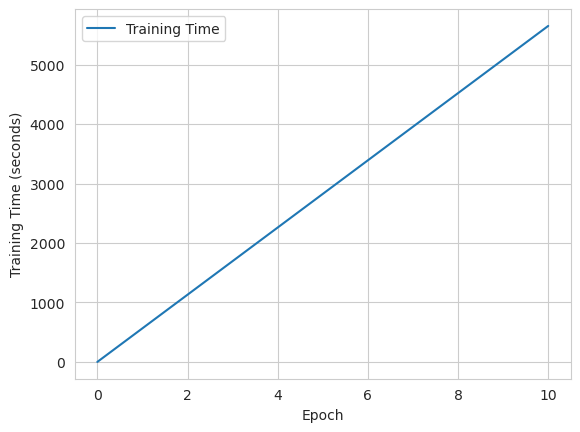

In [26]:
training_time_per_epoch = (end_time - start_time) / len(history_bert.history['accuracy'])

# Plot training time graph
plt.plot(history_bert.epoch, [training_time_per_epoch * i for i in range(len(history_bert.epoch))], label='Training Time')
plt.xlabel('Epoch')
plt.ylabel('Training Time (seconds)')
plt.legend()
plt.savefig("distill_bal_time", dpi = 300)
plt.show()

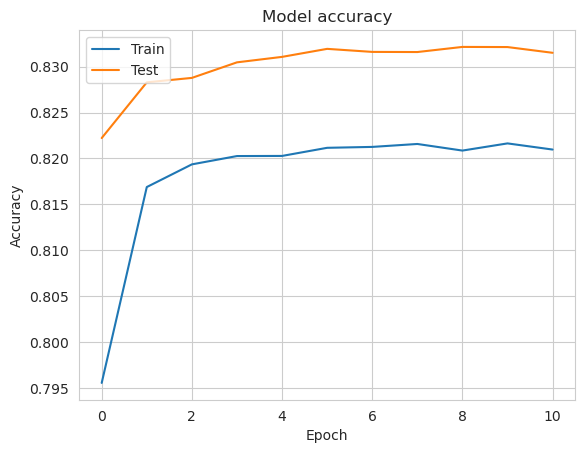

In [27]:
# Plot the validation training graph
plt.plot(history_bert.history['accuracy'])
plt.plot(history_bert.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("distill_bal_acc", format="png", dpi = 300)
plt.show()

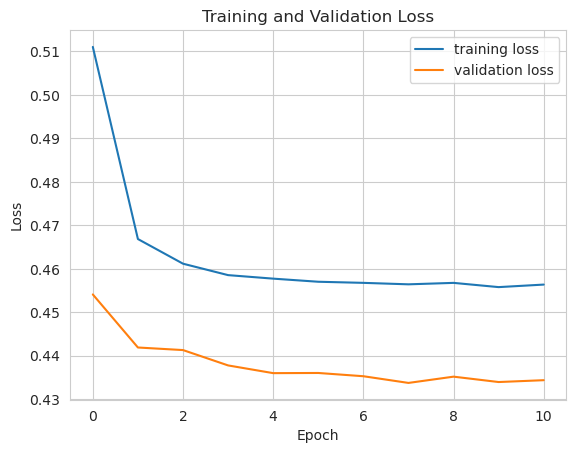

In [28]:
# Plot the training and validation loss
plt.plot(history_bert.history['loss'], label='training loss')
plt.plot(history_bert.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("distill_bal_loss", format="png", dpi = 300)
plt.show()

In [29]:
y_val_bert = np.argmax(y_val_bert, axis=1)

4153/4153 [==============================] - 109s 26ms/step
Confusion Matrix:
[[36401  3733  4022]
 [ 3592 37056  3825]
 [ 3486  3731 37029]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     44156
           1       0.83      0.83      0.83     44473
           2       0.83      0.84      0.83     44246

    accuracy                           0.83    132875
   macro avg       0.83      0.83      0.83    132875
weighted avg       0.83      0.83      0.83    132875



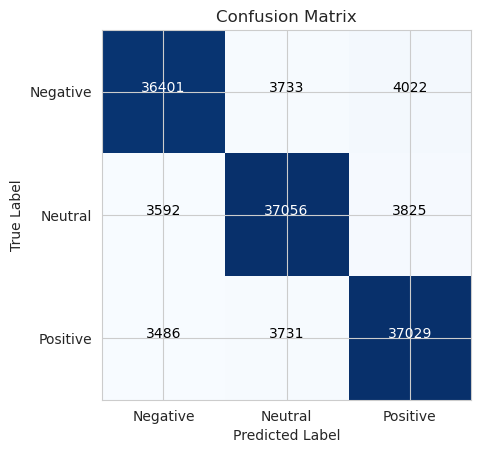

In [30]:
# Load and preprocess your test data (you need to replace this with your actual test data)
#X_test_bert = tokenizer(X_test, padding=True, truncation=True, max_length=max_len, return_tensors='tf')

# Predict on the test data
y_pred_bert = model.predict([X_val_bert['input_ids'], X_val_bert['attention_mask']])

# Convert the predicted probabilities to class labels (0, 1, 2)
y_pred_labels = np.argmax(y_pred_bert, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_val_bert, y_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

# Calculate and print other classification metrics
print("Classification Report:")
print(classification_report(y_val_bert, y_pred_labels))

# Save the confusion matrix as an image file (e.g., PNG)
plt.savefig("distill_bal_confusion_matrix.png", format="png", dpi = 300)

### Distillbert with learning rate.

In [13]:
initial_learning_rate = 3e-5


def scheduler(epoch, lr):
    min_lr = 1e-6  # Define the minimum learning rate

    if epoch < 3:
        return lr
    else:
        new_lr = lr * tf.math.exp(-0.1)  # calculate the new learning rate
        return max(new_lr, min_lr)  # return the maximum of the new learning rate and the minimum allowed value
    

    
lr_schedule = LearningRateScheduler(scheduler)

In [12]:
initial_learning_rate = 3e-5


def scheduler(epoch, lr):
    min_lr = 1e-11  # Define the minimum learning rate

    if epoch < 3:
        return lr
    else:
        new_lr = lr * tf.math.exp(-0.1)  # calculate the new learning rate
        return max(new_lr, min_lr)  # return the maximum of the new learning rate and the minimum allowed value
    

    
lr_schedule = LearningRateScheduler(scheduler)

In [13]:
# Freeze the BERT layers and add a classification layer
input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')
bert_output = bert_model({'input_ids': input_ids, 'attention_mask': attention_mask})[0]
#output = Dense(3, activation='softmax')(bert_output[:, 0, :])
#model = Model(inputs=[input_ids, attention_mask], outputs=output)

In [14]:
# Freeze the BERT layers
bert_model.trainable = False

In [15]:
# Apply Batch Normalization
bert_layer_output_normalized = BatchNormalization(momentum = 0.99)(bert_output)

# Additional layers and output
pooled_output = GlobalAveragePooling1D()(bert_layer_output_normalized)
output = Dense(3, activation='softmax')(pooled_output)
lr_model = Model(inputs=[input_ids, attention_mask], outputs=output)
optimizer = Adam(learning_rate=initial_learning_rate)  # Initial learning rate

In [16]:
# Compile the model
lr_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

lr_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 83)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 83)]         0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['attention_mask[0][0]',         
 BertModel)                     ast_hidden_state=(N               'input_ids[0][0]']              
                                one, 83, 768),                                                    
                                 hidden_states=None                                           

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
start_time = time.time()

lr_bert = lr_model.fit(
    [X_train_bert['input_ids'], X_train_bert['attention_mask']],
    y_train_bert,
    batch_size=256,
    epochs=100,
    validation_data=([X_val_bert['input_ids'], X_val_bert['attention_mask']], y_val_bert),
    callbacks=[early_stop, lr_schedule]
)

end_time = time.time()

Epoch 1/100
2077/2077 [==============================] - 578s 275ms/step - loss: 0.8123 - accuracy: 0.6352 - val_loss: 0.6430 - val_accuracy: 0.7350 - lr: 3.0000e-05
Epoch 2/100
2077/2077 [==============================] - 683s 329ms/step - loss: 0.6161 - accuracy: 0.7492 - val_loss: 0.5693 - val_accuracy: 0.7706 - lr: 3.0000e-05
Epoch 3/100
2077/2077 [==============================] - 683s 329ms/step - loss: 0.5691 - accuracy: 0.7711 - val_loss: 0.5383 - val_accuracy: 0.7843 - lr: 3.0000e-05
Epoch 4/100
2077/2077 [==============================] - 688s 331ms/step - loss: 0.5472 - accuracy: 0.7809 - val_loss: 0.5219 - val_accuracy: 0.7913 - lr: 2.7145e-05
Epoch 5/100
2077/2077 [==============================] - 679s 327ms/step - loss: 0.5337 - accuracy: 0.7870 - val_loss: 0.5115 - val_accuracy: 0.7957 - lr: 2.4562e-05
Epoch 6/100
2077/2077 [==============================] - 684s 329ms/step - loss: 0.5253 - accuracy: 0.7902 - val_loss: 0.5040 - val_accuracy: 0.7997 - lr: 2.2225e-05
Epoc

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2077/2077 [==============================] - 679s 327ms/step - loss: 0.4973 - accuracy: 0.8032 - val_loss: 0.4787 - val_accuracy: 0.8118 - lr: 8.1759e-06
Epoch 17/100
1621/2077 [======================>.......] - ETA: 2:01 - loss: 0.4963 - accuracy: 0.8039

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2077/2077 [==============================] - 686s 330ms/step - loss: 0.4938 - accuracy: 0.8048 - val_loss: 0.4751 - val_accuracy: 0.8134 - lr: 4.9590e-06
Epoch 22/100
1900/2077 [==========================>...] - ETA: 48s - loss: 0.4931 - accuracy: 0.8054

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2077/2077 [==============================] - 686s 330ms/step - loss: 0.4915 - accuracy: 0.8066 - val_loss: 0.4730 - val_accuracy: 0.8147 - lr: 2.7215e-06
Epoch 28/100
1682/2077 [=======================>......] - ETA: 1:46 - loss: 0.4911 - accuracy: 0.8065

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2077/2077 [==============================] - 675s 325ms/step - loss: 0.4907 - accuracy: 0.8062 - val_loss: 0.4719 - val_accuracy: 0.8152 - lr: 1.6507e-06
Epoch 33/100
2077/2077 [==============================] - 673s 324ms/step - loss: 0.4904 - accuracy: 0.8062 - val_loss: 0.4718 - val_accuracy: 0.8152 - lr: 1.4936e-06
Epoch 34/100
 487/2077 [======>.......................] - ETA: 7:37 - loss: 0.4906 - accuracy: 0.8052

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2077/2077 [==============================] - 679s 327ms/step - loss: 0.4891 - accuracy: 0.8071 - val_loss: 0.4712 - val_accuracy: 0.8156 - lr: 9.0592e-07
Epoch 39/100
1519/2077 [====================>.........] - ETA: 2:30 - loss: 0.4889 - accuracy: 0.8077

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2077/2077 [==============================] - 687s 331ms/step - loss: 0.4895 - accuracy: 0.8075 - val_loss: 0.4709 - val_accuracy: 0.8156 - lr: 5.4947e-07
Epoch 44/100
2077/2077 [==============================] - 688s 331ms/step - loss: 0.4890 - accuracy: 0.8073 - val_loss: 0.4709 - val_accuracy: 0.8155 - lr: 4.9718e-07
Epoch 45/100
2077/2077 [==============================] - 676s 326ms/step - loss: 0.4894 - accuracy: 0.8069 - val_loss: 0.4708 - val_accuracy: 0.8158 - lr: 4.4987e-07
Epoch 46/100
2077/2077 [==============================] - 689s 332ms/step - loss: 0.4892 - accuracy: 0.8070 - val_loss: 0.4707 - val_accuracy: 0.8158 - lr: 4.0706e-07
Epoch 47/100
2077/2077 [==============================] - 685s 330ms/step - loss: 0.4890 - accuracy: 0.8074 - val_loss: 0.4707 - val_accuracy: 0.8156 - lr: 3.6832e-07
Epoch 48/100
2077/2077 [==============================] - 685s 330ms/step - loss: 0.4891 - accuracy: 0.8069 - val_loss: 0.4708 - val_accuracy: 0.8157 - lr: 3.3327e-07
Epoch 49/10

In [20]:
# Saving the model.
lr_model.save('lr_bal_distillbert_model')

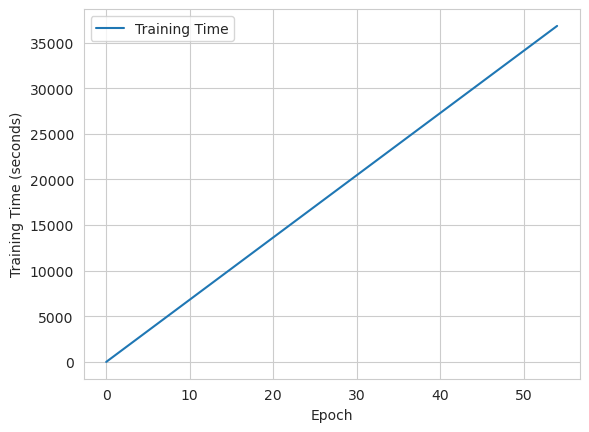

In [21]:
training_time_per_epoch = (end_time - start_time) / len(lr_bert.history['accuracy'])

# Plot training time graph
plt.plot(lr_bert.epoch, [training_time_per_epoch * i for i in range(len(lr_bert.epoch))], label='Training Time')
plt.xlabel('Epoch')
plt.ylabel('Training Time (seconds)')
plt.legend()
plt.savefig("lr_bal_time", dpi = 300)
plt.show()

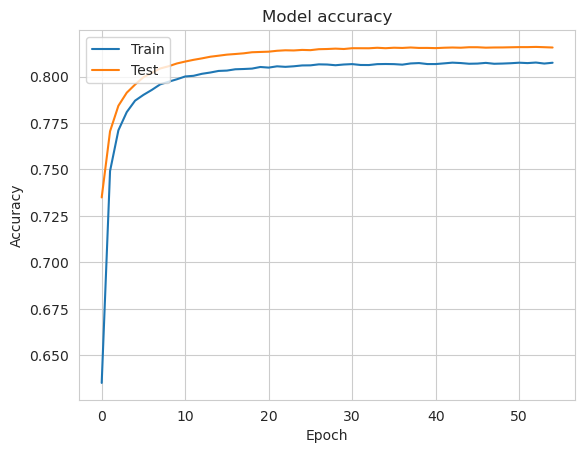

In [22]:
# Plot the validation training graph
plt.plot(lr_bert.history['accuracy'])
plt.plot(lr_bert.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("lr_bal_acc", format="png", dpi = 300)
plt.show()

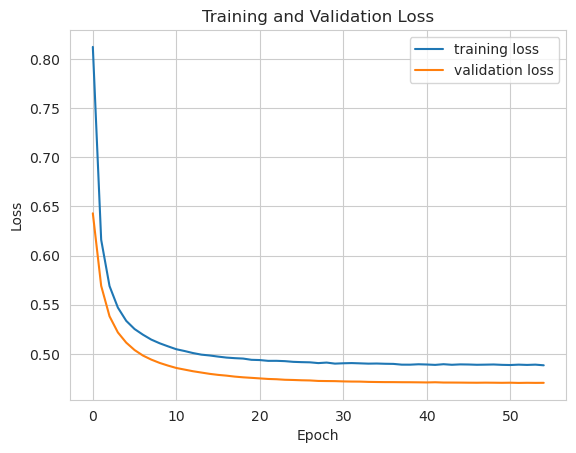

In [23]:
# Plot the training and validation loss
plt.plot(lr_bert.history['loss'], label='training loss')
plt.plot(lr_bert.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("lr_bal_loss", format="png", dpi = 300)
plt.show()

In [24]:
y_val_bert = np.argmax(y_val_bert, axis=1)

4153/4153 [==============================] - 106s 25ms/step
Confusion Matrix:
[[36018  4197  3941]
 [ 3980 36224  4269]
 [ 3960  4150 36136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     44156
           1       0.81      0.81      0.81     44473
           2       0.81      0.82      0.82     44246

    accuracy                           0.82    132875
   macro avg       0.82      0.82      0.82    132875
weighted avg       0.82      0.82      0.82    132875



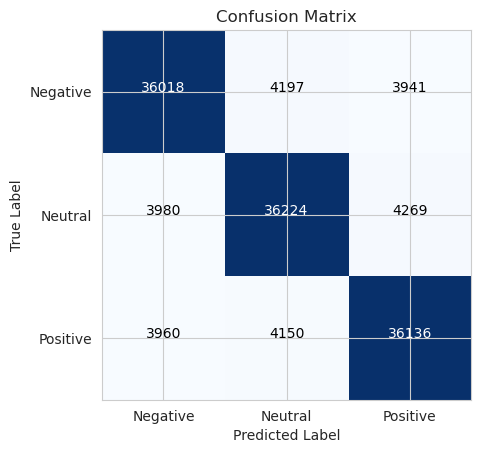

In [25]:
# Load and preprocess your test data (you need to replace this with your actual test data)
#X_test_bert = tokenizer(X_test, padding=True, truncation=True, max_length=max_len, return_tensors='tf')

# Predict on the test data
y_pred_bert = lr_model.predict([X_val_bert['input_ids'], X_val_bert['attention_mask']])

# Convert the predicted probabilities to class labels (0, 1, 2)
y_pred_labels = np.argmax(y_pred_bert, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_val_bert, y_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

# Calculate and print other classification metrics
print("Classification Report:")
print(classification_report(y_val_bert, y_pred_labels))

# Save the confusion matrix as an image file (e.g., PNG)
plt.savefig("lr_bal_confusion_matrix.png", format="png", dpi = 300)

### RoBERTa

In [115]:
# Split the dataset into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(bal_df2["cleaned_text"], bal_df2["Label"], test_size=0.2, random_state=20)

In [135]:
num_classes = 3

In [5]:
# Assuming y_train_bert and y_val_bert are integer-encoded class labels
#y_train = to_categorical(y_train, num_classes=num_classes)
#y_val = to_categorical(y_val, num_classes=num_classes)

In [136]:
# Load the RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = TFRobertaForSequenceClassification.from_pretrained('roberta-base')
# Freeze the layers of the RoBERTa base model
#model.roberta.trainable = False

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [118]:
# Tokenize and encode the training data
train_encoded = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=82, return_tensors='tf')

# Tokenize and encode the validation data
val_encoded = tokenizer(X_val.tolist(), truncation=True, padding=True, max_length=82, return_tensors='tf')

In [39]:
print(train_encoded['input_ids'].shape)
print(val_encoded['input_ids'].shape)

(531499, 82)
(132875, 82)


In [119]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': train_encoded['input_ids'], 'attention_mask': train_encoded['attention_mask']}, tf.keras.utils.to_categorical(y_train, num_classes=3)))
val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': val_encoded['input_ids'], 'attention_mask': val_encoded['attention_mask']}, tf.keras.utils.to_categorical(y_val, num_classes=3)))

In [139]:
# Batch and shuffle the datasets
batch_size = 400
train_dataset = train_dataset.shuffle(len(X_train)).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)

In [140]:
# Unfreeze the last two layers
for layer in model.roberta.encoder.layer[-11:]:
    layer.trainable = True

In [8]:
# Define the model architecture
num_classes = 3
classification_head = tf.keras.layers.Dense(num_classes, activation='softmax', name='classification')
input_ids = tf.keras.layers.Input(shape=(82,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(82,), dtype=tf.int32, name='attention_mask')
roberta_output = model({'input_ids': input_ids, 'attention_mask': attention_mask})['logits']
#outputs = classification_head(roberta_output)

In [141]:
# Define the model architecture
num_classes = 3
classification_head = tf.keras.layers.Dense(num_classes, activation='softmax', name='classification', kernel_regularizer=tf.keras.regularizers.l2(0.01))
input_ids = tf.keras.layers.Input(shape=(82,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(82,), dtype=tf.int32, name='attention_mask')
roberta_output = model({'input_ids': input_ids, 'attention_mask': attention_mask})['logits']
#outputs = classification_head(roberta_output)

In [142]:
# Add Dropout layer
roberta_output = tf.keras.layers.Dropout(0.1)(roberta_output)

# Add Batch Normalization with momentum
roberta_output = tf.keras.layers.BatchNormalization(momentum=0.99)(roberta_output)

outputs = classification_head(roberta_output)

In [26]:
# Add weight decay
weight_decay = 1e-4
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Conv1D) or isinstance(layer, tf.keras.layers.Dense):
        layer.add_loss(lambda: tf.keras.regularizers.l2(weight_decay)(layer.kernel))

In [124]:
# Create the model
roberta_model_multiclass = tf.keras.Model(inputs={'input_ids': input_ids, 'attention_mask': attention_mask}, outputs=outputs)

In [143]:
initial_learning_rate = 3e-5


def scheduler(epoch, lr):
    min_lr = 1e-11  # Define the minimum learning rate

    if epoch < 3:
        return lr
    else:
        new_lr = lr * tf.math.exp(-0.1)  # calculate the new learning rate
        return max(new_lr, min_lr)  # return the maximum of the new learning rate and the minimum allowed value

In [144]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
roberta_model_multiclass.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
roberta_model_multiclass.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 82)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 82)]         0           []                               
                                                                                                  
 tf_roberta_for_sequence_classi  TFSequenceClassifie  124647170  ['attention_mask[0][0]',         
 fication_3 (TFRobertaForSequen  rOutput(loss=None,               'input_ids[0][0]']              
 ceClassification)              logits=(None, 2),                                                 
                                 hidden_states=None                                         

In [13]:
# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3)
lr_schedule = LearningRateScheduler(scheduler)

In [14]:
# Train the model
start_time = time.time()
history = roberta_model_multiclass.fit(train_dataset, validation_data=val_dataset, epochs=100, callbacks=[early_stop, lr_schedule])
end_time = time.time()

Epoch 1/100
1329/1329 [==============================] - 1315s 979ms/step - loss: 0.9933 - accuracy: 0.5826 - val_loss: 0.9456 - val_accuracy: 0.7288 - lr: 3.0000e-05
Epoch 2/100
1329/1329 [==============================] - 1429s 1s/step - loss: 0.9395 - accuracy: 0.6402 - val_loss: 0.9115 - val_accuracy: 0.7425 - lr: 3.0000e-05
Epoch 3/100
1329/1329 [==============================] - 1411s 1s/step - loss: 0.9128 - accuracy: 0.6463 - val_loss: 0.8806 - val_accuracy: 0.7460 - lr: 3.0000e-05
Epoch 4/100
1329/1329 [==============================] - 1415s 1s/step - loss: 0.8909 - accuracy: 0.6491 - val_loss: 0.8531 - val_accuracy: 0.7455 - lr: 2.7145e-05
Epoch 5/100
1329/1329 [==============================] - 1439s 1s/step - loss: 0.8746 - accuracy: 0.6498 - val_loss: 0.8302 - val_accuracy: 0.7486 - lr: 2.4562e-05
Epoch 6/100
1329/1329 [==============================] - 1426s 1s/step - loss: 0.8606 - accuracy: 0.6500 - val_loss: 0.8087 - val_accuracy: 0.7481 - lr: 2.2225e-05
Epoch 7/100
1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1329/1329 [==============================] - 1447s 1s/step - loss: 0.8038 - accuracy: 0.6535 - val_loss: 0.6967 - val_accuracy: 0.7514 - lr: 5.4805e-06
Epoch 21/100
1329/1329 [==============================] - 1449s 1s/step - loss: 0.8037 - accuracy: 0.6532 - val_loss: 0.6950 - val_accuracy: 0.7522 - lr: 4.9590e-06
Epoch 22/100
 992/1329 [=====================>........] - ETA: 4:59 - loss: 0.8021 - accuracy: 0.6531

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1329/1329 [==============================] - 1458s 1s/step - loss: 0.8015 - accuracy: 0.6530 - val_loss: 0.6913 - val_accuracy: 0.7529 - lr: 4.0601e-06
Epoch 24/100
1329/1329 [==============================] - 1456s 1s/step - loss: 0.8014 - accuracy: 0.6536 - val_loss: 0.6907 - val_accuracy: 0.7531 - lr: 3.6737e-06
Epoch 25/100
1329/1329 [==============================] - 1455s 1s/step - loss: 0.8009 - accuracy: 0.6531 - val_loss: 0.6886 - val_accuracy: 0.7535 - lr: 3.3241e-06
Epoch 26/100
1329/1329 [==============================] - 1452s 1s/step - loss: 0.8002 - accuracy: 0.6545 - val_loss: 0.6884 - val_accuracy: 0.7534 - lr: 3.0078e-06
Epoch 27/100
1329/1329 [==============================] - 1454s 1s/step - loss: 0.7999 - accuracy: 0.6537 - val_loss: 0.6875 - val_accuracy: 0.7530 - lr: 2.7215e-06
Epoch 28/100
1329/1329 [==============================] - 1465s 1s/step - loss: 0.7985 - accuracy: 0.6541 - val_loss: 0.6861 - val_accuracy: 0.7535 - lr: 2.4625e-06
Epoch 29/100
1329/1329 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1329/1329 [==============================] - 1475s 1s/step - loss: 0.7979 - accuracy: 0.6546 - val_loss: 0.6821 - val_accuracy: 0.7531 - lr: 7.4170e-07
Epoch 41/100
1329/1329 [==============================] - 1477s 1s/step - loss: 0.7975 - accuracy: 0.6536 - val_loss: 0.6823 - val_accuracy: 0.7531 - lr: 6.7112e-07
Epoch 42/100
1329/1329 [==============================] - 1506s 1s/step - loss: 0.7981 - accuracy: 0.6543 - val_loss: 0.6822 - val_accuracy: 0.7531 - lr: 6.0726e-07


In [16]:
# Saving the model.
roberta_model_multiclass.save('roberta_model')

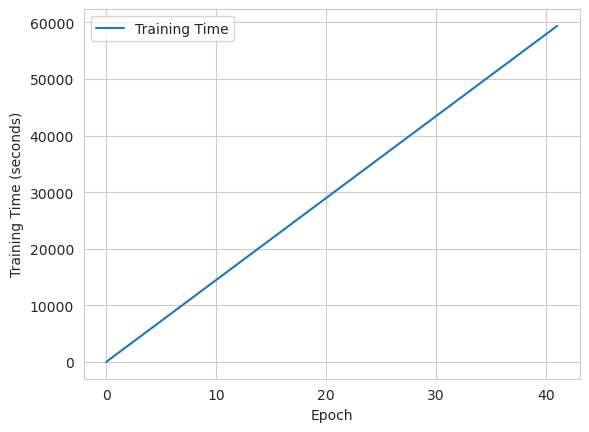

In [17]:
training_time_per_epoch = (end_time - start_time) / len(history.history['accuracy'])

# Plot training time graph
plt.plot(history.epoch, [training_time_per_epoch * i for i in range(len(history.epoch))], label='Training Time')
plt.xlabel('Epoch')
plt.ylabel('Training Time (seconds)')
plt.legend()
plt.savefig("rb_time", dpi = 300)
plt.show()

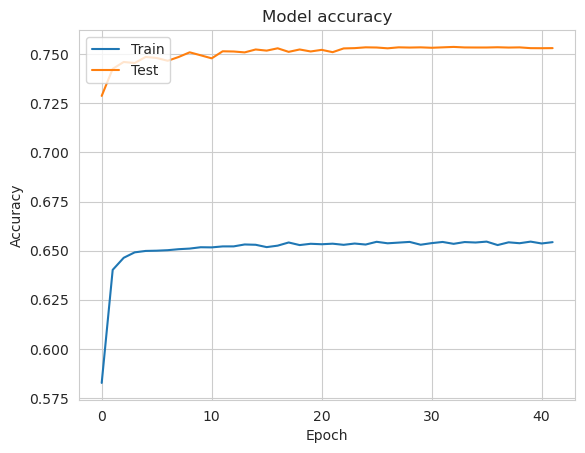

In [18]:
# Plot the validation training graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("rb_acc", format="png", dpi = 300)
plt.show()

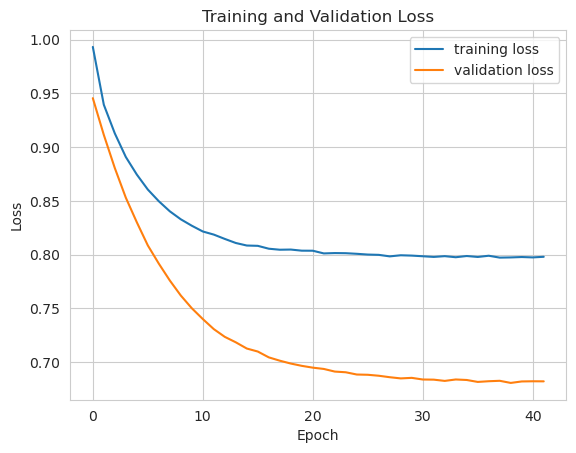

In [19]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("rb_loss", format="png", dpi = 300)
plt.show()

333/333 [==============================] - 198s 595ms/step


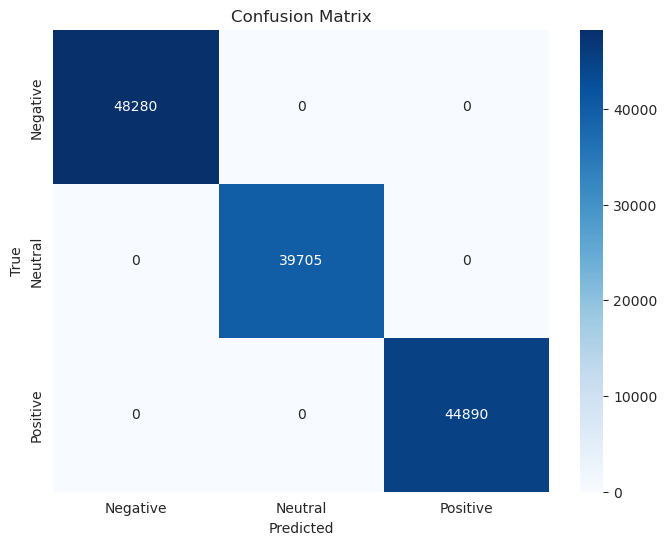

In [25]:
# Predict labels for the validation dataset
y_val_pred = roberta_model_multiclass.evaluate(val_dataset)

# Assuming y_val is the true labels in one-hot encoded format
y_val_true = np.argmax(y_val_pred, axis=1)

# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_val_true, np.argmax(y_val_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Save the plot
plt.savefig('rb_confusion_matrix_plot.png')

# Show the plot (optional)
plt.show()


333/333 [==============================] - 199s 599ms/step
Confusion Matrix:
[[35427  4434  4322]
 [ 7095 30691  6618]
 [ 5758  4580 33950]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.77     44183
           1       0.77      0.69      0.73     44404
           2       0.76      0.77      0.76     44288

    accuracy                           0.75    132875
   macro avg       0.75      0.75      0.75    132875
weighted avg       0.75      0.75      0.75    132875



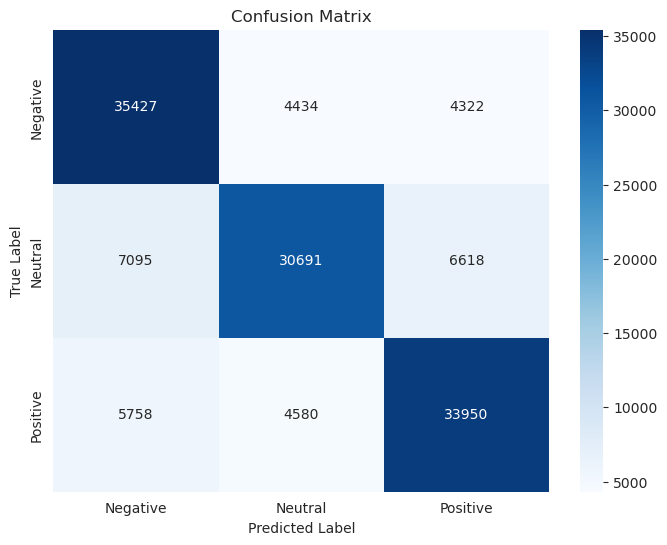

In [36]:
# Predict on the validation data
y_val_pred_probs = roberta_model_multiclass.predict(val_dataset)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("rb_confusion_matrix.png")

# Calculate and print other classification metrics
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

### ALBERT

In [3]:
# Split the dataset into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(bal_df2["cleaned_text"], bal_df2["Label"], test_size=0.2, random_state=10)

In [4]:
# Split the dataset into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(bal_df2["cleaned_text"], bal_df2["Label"], test_size=0.2, random_state=10)

# Set the maximum sequence length
max_len = 81

# Instantiate and fit the Electra tokenizer on training data
tokenizer = AlbertTokenizer.from_pretrained("albert-base-v2")

# Tokenize both training and validation data
train_encoded_data = tokenizer(list(X_train), padding=True, truncation=True, max_length=max_len, pad_to_max_length=True, return_tensors='tf')
val_encoded_data = tokenizer(list(X_val), padding=True, truncation=True, max_length=max_len, pad_to_max_length=True, return_tensors='tf')

# Access the tokenized input IDs and attention masks
X_train_input_ids = train_encoded_data['input_ids']
X_train_attention_mask = train_encoded_data['attention_mask']

X_val_input_ids = val_encoded_data['input_ids']
X_val_attention_mask = val_encoded_data['attention_mask']

# Assuming y_train and y_val are integer-encoded class labels
num_classes = 3
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

In [5]:
# Load Electra model
albert_model = TFAlbertForSequenceClassification.from_pretrained("albert-base-v2")

# Define your model architecture
input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

# Get the Electra output
albert_output = albert_model({'input_ids': input_ids, 'attention_mask': attention_mask})[0]

#for layer in albert_model.layers[-2:]:
    #layer.trainable = True

for layer in albert_model.layers:
    layer.trainable = False

All PyTorch model weights were used when initializing TFAlbertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFAlbertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
l2_regularization = 1e-4  # You can adjust the value based on your needs

# Simplified architecture
dropout_rate = 0.9
dense_layer = Dense(256, activation='relu', kernel_regularizer=l2(l2_regularization))(albert_output)
dense_layer = Dense(128, activation='relu', kernel_regularizer=l2(l2_regularization))(dense_layer)
dense_layer = Dense(32, activation='relu', kernel_regularizer=l2(l2_regularization))(dense_layer)

normalized = BatchNormalization(momentum = 0.99)(dense_layer)
dropout_layer = Dropout(dropout_rate)(normalized)
output = Dense(num_classes, activation='softmax')(dropout_layer)
 
# Build the model
model = Model(inputs=[input_ids, attention_mask], outputs=output)

initial_learning_rate = 3e-5

def scheduler(epoch, lr):
    min_lr = 1e-11  # Define the minimum learning rate

    if epoch < 3:
        return lr
    else:
        new_lr = lr * tf.math.exp(-0.1)  # calculate the new learning rate
        return max(new_lr, min_lr)  # return the maximum of the new learning rate and the minimum allowed value

    #Compile the model with a less aggressive learning rate schedule
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
 
# Model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 81)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 81)]         0           []                               
                                                                                                  
 tf_albert_for_sequence_classif  TFSequenceClassifie  11685122   ['attention_mask[0][0]',         
 ication (TFAlbertForSequenceCl  rOutput(loss=None,               'input_ids[0][0]']              
 assification)                  logits=(None, 2),                                                 
                                 hidden_states=None                                           

In [7]:
# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3)
lr_schedule = LearningRateScheduler(scheduler)

In [ ]:
# Train the model
start_time = time.time()
history = model.fit(
    [X_train_input_ids, X_train_attention_mask],
    y_train,
    batch_size=400,  # Smaller batch size
    epochs=100,  # Fewer epochs
    validation_data=([X_val_input_ids, X_val_attention_mask], y_val),
    callbacks=[early_stop, lr_schedule]
)
end_time = time.time()

Epoch 1/100
1329/1329 [==============================] - 1048s 778ms/step - loss: 1.1336 - accuracy: 0.3399 - val_loss: 1.1145 - val_accuracy: 0.3671 - lr: 3.0000e-05
Epoch 2/100
1329/1329 [==============================] - 1109s 834ms/step - loss: 1.1144 - accuracy: 0.3411 - val_loss: 1.1123 - val_accuracy: 0.3529 - lr: 3.0000e-05
Epoch 3/100
1329/1329 [==============================] - 1108s 834ms/step - loss: 1.1121 - accuracy: 0.3387 - val_loss: 1.1103 - val_accuracy: 0.3785 - lr: 3.0000e-05
Epoch 4/100
1329/1329 [==============================] - 1113s 837ms/step - loss: 1.1109 - accuracy: 0.3410 - val_loss: 1.1098 - val_accuracy: 0.3711 - lr: 2.7145e-05
Epoch 5/100
1329/1329 [==============================] - 1115s 839ms/step - loss: 1.1101 - accuracy: 0.3401 - val_loss: 1.1090 - val_accuracy: 0.3872 - lr: 2.4562e-05
Epoch 6/100
1329/1329 [==============================] - 1115s 839ms/step - loss: 1.1095 - accuracy: 0.3405 - val_loss: 1.1087 - val_accuracy: 0.3500 - lr: 2.2225e-0

In [9]:
# Saving the model.
model.save('albert_model')

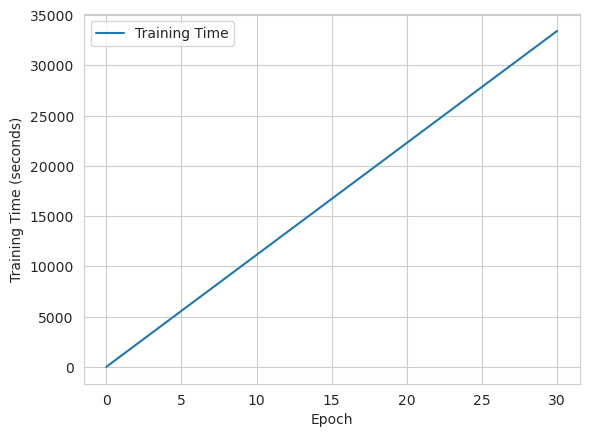

In [10]:
training_time_per_epoch = (end_time - start_time) / len(history.history['accuracy'])

# Plot training time graph
plt.plot(history.epoch, [training_time_per_epoch * i for i in range(len(history.epoch))], label='Training Time')
plt.xlabel('Epoch')
plt.ylabel('Training Time (seconds)')
plt.legend()
plt.savefig("albert_time", dpi = 300)
plt.show()

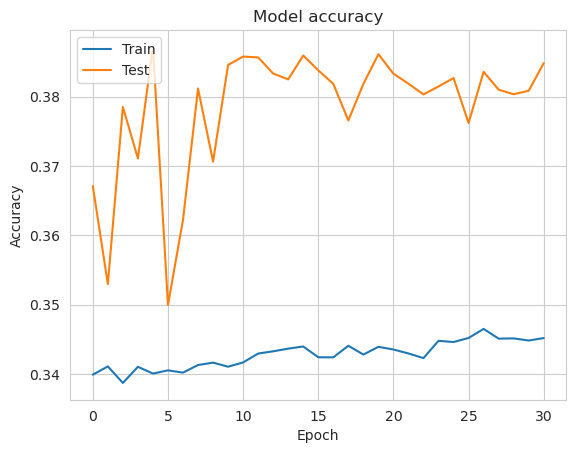

In [11]:
# Plot the validation training graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("albert_acc", format="png", dpi = 300)
plt.show()

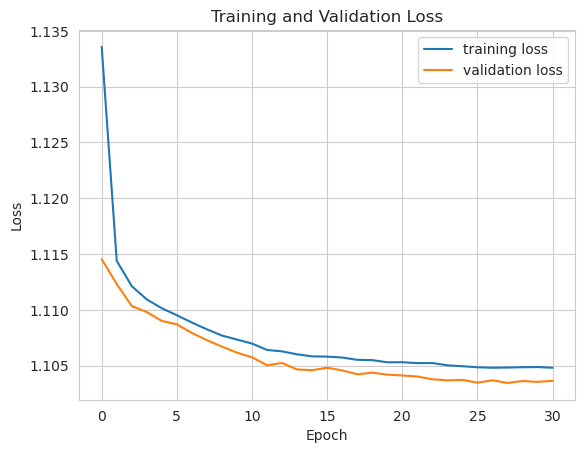

In [12]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("albert_loss", format="png", dpi = 300)
plt.show()

4153/4153 [==============================] - 226s 54ms/step
Confusion Matrix:
[[25161 11009  7986]
 [20224 14372  9877]
 [19842 12790 11614]]
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.57      0.46     44156
           1       0.38      0.32      0.35     44473
           2       0.39      0.26      0.32     44246

    accuracy                           0.38    132875
   macro avg       0.39      0.39      0.37    132875
weighted avg       0.39      0.38      0.37    132875



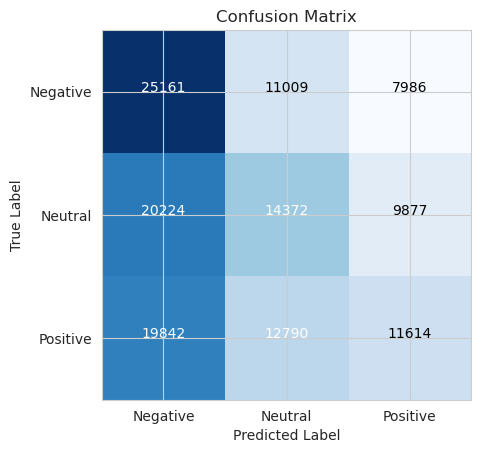

In [13]:
# Load and preprocess your test data (you need to replace this with your actual test data)
#X_test_bert = tokenizer(X_test, padding=True, truncation=True, max_length=max_len, return_tensors='tf')

# Predict on the test data
y_val = np.argmax(y_val, axis=1)
y_pred = model.predict([X_val_input_ids, X_val_attention_mask])

# Convert the predicted probabilities to class labels (0, 1, 2)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

# Calculate and print other classification metrics
print("Classification Report:")
print(classification_report(y_val, y_pred_labels))

# Save the confusion matrix as an image file (e.g., PNG)
plt.savefig("albert_confusion_matrix.png", format="png", dpi = 300)

#### Layers Unfreezed

In [31]:
# Split the dataset into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(bal_df2["cleaned_text"], bal_df2["Label"], test_size=0.2, random_state=10)

# Set the maximum sequence length
max_len = 81

# Instantiate and fit the Electra tokenizer on training data
tokenizer = AlbertTokenizer.from_pretrained("albert-base-v2")

# Tokenize both training and validation data
train_encoded_data = tokenizer(list(X_train), padding=True, truncation=True, max_length=max_len, pad_to_max_length=True, return_tensors='tf')
val_encoded_data = tokenizer(list(X_val), padding=True, truncation=True, max_length=max_len, pad_to_max_length=True, return_tensors='tf')

# Access the tokenized input IDs and attention masks
X_train_input_ids = train_encoded_data['input_ids']
X_train_attention_mask = train_encoded_data['attention_mask']

X_val_input_ids = val_encoded_data['input_ids']
X_val_attention_mask = val_encoded_data['attention_mask']

# Assuming y_train and y_val are integer-encoded class labels
num_classes = 3
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

In [32]:
# Load Albert model
albert_model = TFAlbertForSequenceClassification.from_pretrained("albert-base-v2")

# Define your model architecture
input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

# Get the Electra output
albert_output = albert_model({'input_ids': input_ids, 'attention_mask': attention_mask})[0]

for layer in albert_model.layers[-11:]:
    layer.trainable = True

#for layer in albert_model.layers:
    #layer.trainable = False

All PyTorch model weights were used when initializing TFAlbertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFAlbertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
l2_regularization = 1e-4  # You can adjust the value based on your needs

# Simplified architecture
dropout_rate = 0.7
dense_layer = Dense(256, activation='relu', kernel_regularizer=l2(l2_regularization))(albert_output)
dense_layer = Dense(128, activation='relu', kernel_regularizer=l2(l2_regularization))(dense_layer)
dense_layer = Dense(32, activation='relu', kernel_regularizer=l2(l2_regularization))(dense_layer)

normalized = BatchNormalization(momentum = 0.99)(dense_layer)
dropout_layer = Dropout(dropout_rate)(normalized)
output = Dense(num_classes, activation='softmax')(dropout_layer)
 
# Build the model
model = Model(inputs=[input_ids, attention_mask], outputs=output)

initial_learning_rate = 3e-5

def scheduler(epoch, lr):
    min_lr = 1e-11  # Define the minimum learning rate

    if epoch < 3:
        return lr
    else:
        new_lr = lr * tf.math.exp(-0.1)  # calculate the new learning rate
        return max(new_lr, min_lr)  # return the maximum of the new learning rate and the minimum allowed value

    #Compile the model with a less aggressive learning rate schedule
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
 
# Model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 81)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 81)]         0           []                               
                                                                                                  
 tf_albert_for_sequence_classif  TFSequenceClassifie  11685122   ['attention_mask[0][0]',         
 ication_1 (TFAlbertForSequence  rOutput(loss=None,               'input_ids[0][0]']              
 Classification)                logits=(None, 2),                                                 
                                 hidden_states=None                                         

In [10]:
# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3)
lr_schedule = LearningRateScheduler(scheduler)

In [11]:
# Train the model
start_time = time.time()
history = model.fit(
    [X_train_input_ids, X_train_attention_mask],
    y_train,
    batch_size=400,  # Smaller batch size
    epochs=100,  # Fewer epochs
    validation_data=([X_val_input_ids, X_val_attention_mask], y_val),
    callbacks=[early_stop, lr_schedule]
)
end_time = time.time()

Epoch 1/100
1329/1329 [==============================] - 2241s 2s/step - loss: 0.2556 - accuracy: 0.9255 - val_loss: 0.0936 - val_accuracy: 0.9737 - lr: 3.0000e-05
Epoch 2/100
1329/1329 [==============================] - 2246s 2s/step - loss: 0.1721 - accuracy: 0.9564 - val_loss: 0.0823 - val_accuracy: 0.9746 - lr: 3.0000e-05
Epoch 3/100
1329/1329 [==============================] - 2251s 2s/step - loss: 0.1489 - accuracy: 0.9599 - val_loss: 0.0791 - val_accuracy: 0.9741 - lr: 3.0000e-05
Epoch 4/100
1329/1329 [==============================] - 2236s 2s/step - loss: 0.1354 - accuracy: 0.9626 - val_loss: 0.0769 - val_accuracy: 0.9738 - lr: 2.7145e-05
Epoch 5/100
1329/1329 [==============================] - 2226s 2s/step - loss: 0.1242 - accuracy: 0.9656 - val_loss: 0.0708 - val_accuracy: 0.9780 - lr: 2.4562e-05
Epoch 6/100
1329/1329 [==============================] - 2230s 2s/step - loss: 0.1108 - accuracy: 0.9703 - val_loss: 0.0682 - val_accuracy: 0.9805 - lr: 2.2225e-05
Epoch 7/100
1329

In [12]:
# Saving the model.
model.save('albert2_model')

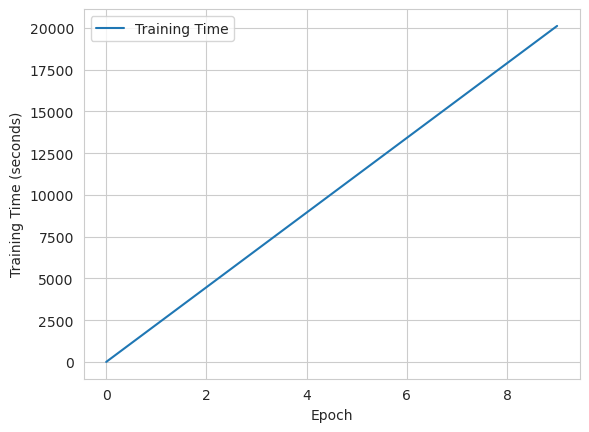

In [13]:
training_time_per_epoch = (end_time - start_time) / len(history.history['accuracy'])

# Plot training time graph
plt.plot(history.epoch, [training_time_per_epoch * i for i in range(len(history.epoch))], label='Training Time')
plt.xlabel('Epoch')
plt.ylabel('Training Time (seconds)')
plt.legend()
plt.savefig("albert2_time", dpi = 300)
plt.show()

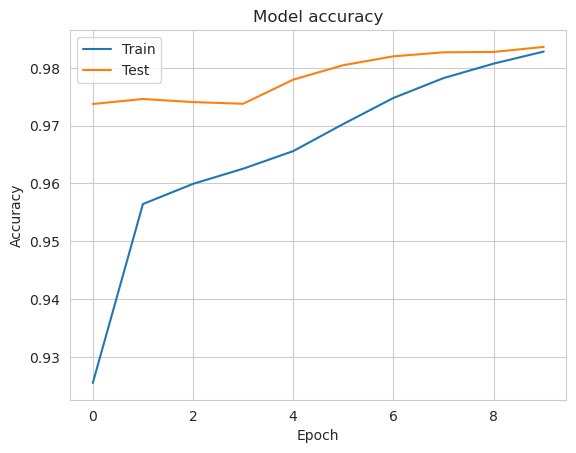

In [14]:
# Plot the validation training graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("albert2_acc", format="png", dpi = 300)
plt.show()

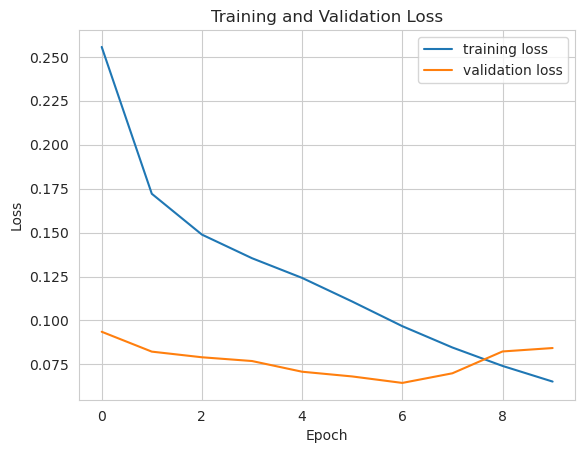

In [15]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("albert2_loss", format="png", dpi = 300)
plt.show()

4153/4153 [==============================] - 226s 54ms/step
Confusion Matrix:
[[43590   359   207]
 [  368 43835   270]
 [  352   620 43274]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     44156
           1       0.98      0.99      0.98     44473
           2       0.99      0.98      0.98     44246

    accuracy                           0.98    132875
   macro avg       0.98      0.98      0.98    132875
weighted avg       0.98      0.98      0.98    132875



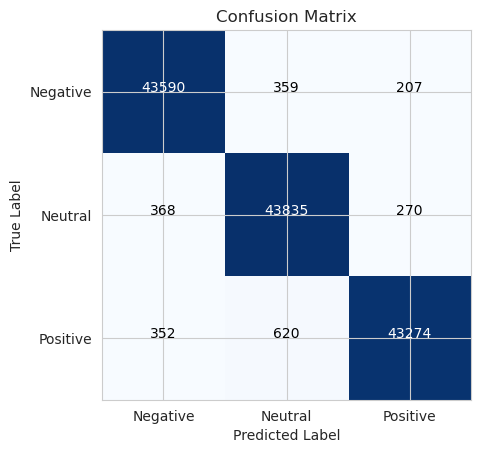

In [16]:
# Load and preprocess your test data (you need to replace this with your actual test data)
#X_test_bert = tokenizer(X_test, padding=True, truncation=True, max_length=max_len, return_tensors='tf')

# Predict on the test data
y_val = np.argmax(y_val, axis=1)
y_pred = model.predict([X_val_input_ids, X_val_attention_mask])

# Convert the predicted probabilities to class labels (0, 1, 2)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Neutral', 'Positive'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

# Calculate and print other classification metrics
print("Classification Report:")
print(classification_report(y_val, y_pred_labels))

# Save the confusion matrix as an image file (e.g., PNG)
plt.savefig("albert2_confusion_matrix.png", format="png", dpi = 300)

### Vader Sentiment Analyzer

In [4]:
new_bal_df = bal_df2.copy()

In [5]:
new_bal_df

,Text,Language,Label,cleaned_text
0,Rwanda is set to host the headquarters of Unit...,en,2,rwanda set host headquarters united nation dev...
1,Wimbledon: Nick Kyrgios admits spitting toward...,en,2,wimbledon nick kyrgios admits spitting towards...
2,is booktwt a thing? if so thats her and she sp...,en,2,booktwt thing thats speaks perfect grammar spe...
3,At the end we consume fictional stories to enj...,en,2,end consume fictional story enjoy seem fair pe...
4,#Duranto Express A1 coach AC not working prope...,en,2,express coach ac working properly prayagraj lt...
...,...,...,...,...
664369,@66usual @streetphantom @FiveSpiresLive It's a...,en,1,fairy tale stand nothing lose anyway might wel...
664370,Probably gonna try and push scholar as far as ...,en,1,probably gon na try push scholar far day anyon...
664371,Spent half an hour looking for my glasses yest...,en,1,spent half hour looking glass yesterday mornin...
664372,@ExamsCouncil i may not be if help but i know ...,en,1,may help know help somewhereplease help childh...


In [6]:
# Instantiating Sentiment Intensity Analyzer

vader_sia = SentimentIntensityAnalyzer()

In [7]:
# Defining a function to label sentiment based on compound score.

def sentiment_label(compound_score):
    if compound_score >= 0.05:
        return 2
    elif compound_score <= -0.05:
        return 0
    else:
        return 1

In [8]:
# Apply VADER sentiment analysis to each row in the 'cleaned_text' column
new_bal_df['vader_scores'] = new_bal_df['cleaned_text'].apply(lambda x: vader_sia.polarity_scores(x))

# Extract the compound score from the VADER scores
new_bal_df['vader_compound'] = new_bal_df['vader_scores'].apply(lambda x: x['compound'])

# Apply the categorization to create a new column 'vader_sentiment'
new_bal_df['vader_sentiment'] = new_bal_df['vader_compound'].apply(sentiment_label)

In [ ]:
# Assuming 'Sentiment' contains the true labels
true_labels = new_bal_df['Label']
# Drop rows with NaN values in 'Sentiment'
true_labels = true_labels.dropna()

# Assuming 'vader_sentiment' contains the predicted labels
predicted_labels = new_bal_df['vader_sentiment']
# Drop corresponding rows with NaN values in 'vader_sentiment'
predicted_labels = predicted_labels.dropna()

# Print lengths for debugging
print("Length of true_labels:", len(true_labels))
print("Length of predicted_labels:", len(predicted_labels))

# Ensure both labels have the same length
min_length = min(len(true_labels), len(predicted_labels))
true_labels = true_labels[:min_length]
predicted_labels = predicted_labels[:min_length]

# Print lengths after adjustment
print("Adjusted length of true_labels:", len(true_labels))
print("Adjusted length of predicted_labels:", len(predicted_labels))

# Generate classification report
classification_report_vader = classification_report(true_labels, predicted_labels)
print("VADER Classification Report:")
print(classification_report_vader)

# Generate confusion matrix
#conf_matrix_vader = confusion_matrix(true_labels, predicted_labels, labels=new_bal_df['Label'].unique())
#print("VADER Confusion Matrix:")
#print(conf_matrix_vader)

# Calculate confusion matrix
conf_matrix_vader = confusion_matrix(true_labels, predicted_labels, labels=new_bal_df['Label'].unique())

# Map numerical labels to corresponding sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
class_labels = [sentiment_labels[int(label)] for label in classes]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_vader, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("VADER Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Save the plot
plt.savefig("confusion_matrix_vader.png")

# Show the plot
plt.show()


In [13]:
# Assuming 'Sentiment' contains the true labels
true_labels = new_bal_df['Label']
# Drop rows with NaN values in 'Sentiment'
true_labels = true_labels.dropna()

# Assuming 'vader_sentiment' contains the predicted labels
predicted_labels = new_bal_df['vader_sentiment']
# Drop corresponding rows with NaN values in 'vader_sentiment'
predicted_labels = predicted_labels.dropna()

# Print lengths for debugging
print("Length of true_labels:", len(true_labels))
print("Length of predicted_labels:", len(predicted_labels))

# Ensure both labels have the same length
min_length = min(len(true_labels), len(predicted_labels))
true_labels = true_labels[:min_length]
predicted_labels = predicted_labels[:min_length]

# Print lengths after adjustment
print("Adjusted length of true_labels:", len(true_labels))
print("Adjusted length of predicted_labels:", len(predicted_labels))

# Generate classification report
classification_report_vader = classification_report(true_labels, predicted_labels)
print("VADER Classification Report:")
print(classification_report_vader)

Length of true_labels: 664374
Length of predicted_labels: 664374
Adjusted length of true_labels: 664374
Adjusted length of predicted_labels: 664374
VADER Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.63      0.61    221458
           1       0.62      0.20      0.31    221458
           2       0.52      0.84      0.64    221458

    accuracy                           0.56    664374
   macro avg       0.58      0.56      0.52    664374
weighted avg       0.58      0.56      0.52    664374



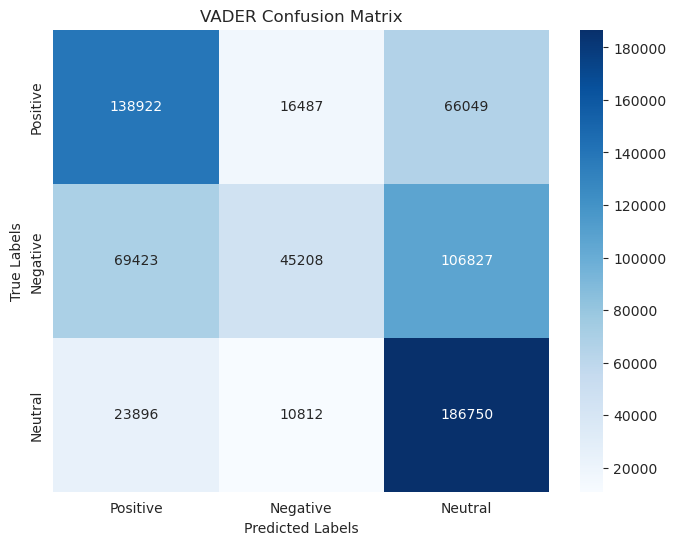

In [12]:
# Calculate confusion matrix
conf_matrix_vader = confusion_matrix(true_labels, predicted_labels)

# Get unique classes from true labels
classes = new_bal_df['Label'].unique()

# Map numerical labels to corresponding sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
class_labels = [sentiment_labels[int(label)] for label in classes]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_vader, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("VADER Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Save the plot
plt.savefig("confusion_matrix_vader.png")

# Show the plot
plt.show()

### TextBlob Sentiment Analyzer

In [14]:
# Initialize a list to store the classifications
classifications = []

for text in new_bal_df["cleaned_text"]:
    analysis = TextBlob(text)
    # Get the polarity (sentiment score)
    polarity = analysis.sentiment.polarity

    # Classify based on polarity (you can customize this based on your criteria)
    if polarity >= 0.05:
        sentiment = 2  # Positive
    elif polarity <= -0.05:
        sentiment = 0  # Negative
    else:
        sentiment = 1  # Neutral

    classifications.append((text, polarity, sentiment))

# Create a DataFrame using the classifications list
classification_df = pd.DataFrame(classifications, columns=["Text", "TextBlob_Polarity_Score", "TextBlob_Sentiment"])

In [15]:
# Concatenate the DataFrames side by side
new_bal_df = pd.concat([new_bal_df, classification_df], axis=1)

In [16]:
# Assuming 'Sentiment' contains the true labels
true_labels = new_bal_df['Label']
# Drop rows with NaN values in 'Sentiment'
true_labels = true_labels.dropna()

# Assuming 'vader_sentiment' contains the predicted labels
predicted_labels = new_bal_df['TextBlob_Sentiment']
# Drop corresponding rows with NaN values in 'vader_sentiment'
predicted_labels = predicted_labels.dropna()

# Print lengths for debugging
print("Length of true_labels:", len(true_labels))
print("Length of predicted_labels:", len(predicted_labels))

# Ensure both labels have the same length
min_length = min(len(true_labels), len(predicted_labels))
true_labels = true_labels[:min_length]
predicted_labels = predicted_labels[:min_length]

# Print lengths after adjustment
print("Adjusted length of true_labels:", len(true_labels))
print("Adjusted length of predicted_labels:", len(predicted_labels))

# Generate classification report
classification_report_textblob = classification_report(true_labels, predicted_labels)
print("TextBlob Classification Report:")
print(classification_report_textblob)

Length of true_labels: 664374
Length of predicted_labels: 664374
Adjusted length of true_labels: 664374
Adjusted length of predicted_labels: 664374
TextBlob Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.50      0.56    221458
           1       0.46      0.36      0.40    221458
           2       0.52      0.75      0.61    221458

    accuracy                           0.54    664374
   macro avg       0.54      0.54      0.53    664374
weighted avg       0.54      0.54      0.53    664374



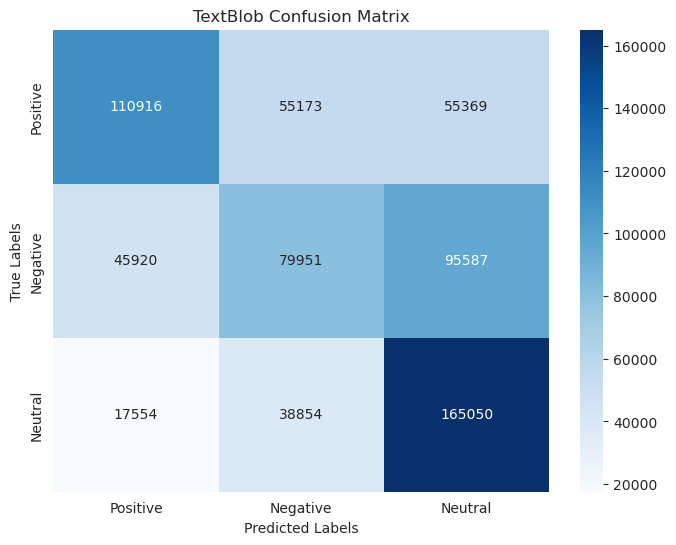

In [19]:
# Calculate confusion matrix
conf_matrix_textblob = confusion_matrix(true_labels, predicted_labels)

# Get unique classes from true labels
classes = new_bal_df['Label'].unique()

# Map numerical labels to corresponding sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
class_labels = [sentiment_labels[int(label)] for label in classes]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_textblob, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("TextBlob Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Save the plot
plt.savefig("confusion_matrix_textblob.png")

# Show the plot
plt.show()